# <p style="text-align:center;">**SAAS SALES ANALYSIS**</p>
### <p style="text-align:center;">**Capstone Modul 2**</p>
---

# **LATAR BELAKANG**

AWS SaaS (Software as a Service) Sales adalah penjualan layanan berbasis cloud yang ditawarkan oleh Amazon Web Services dalam model SaaS. Dalam model ini, AWS menyediakan platform infrastruktur cloud, sedangkan penyedia SaaS mengembangkan dan mendistribusikan perangkat lunak yang dapat diakses oleh pelanggan melalui internet tanpa perlu pengelolaan fisik.

AWS memfasilitasi perusahaan SaaS untuk menciptakan, mendistribusikan, dan memasarkan produk mereka secara global. Dalam konteks penjualan, ini melibatkan strategi untuk mendekati pelanggan potensial, memahami kebutuhan bisnis mereka, dan mempromosikan solusi berbasis cloud sebagai cara untuk meningkatkan efisiensi, skalabilitas, dan penghematan biaya.

# **RUMUSAN DAN TUJUAN MASALAH**

Perusahaan menghadapi tantangan besar dalam mengoptimalkan penjualan dan profit karena:
1. Efisiensi Penjualan dan Profit
- Penjualan tidak merata di wilayah tertentu.
- Produk kurang dioptimalkan berdasarkan kebutuhan pasar.
- Margin keuntungan menurun akibat biaya operasional yang tinggi.

2. Program Diskon
- Diskon tidak efektif karena kurang terarah.
- Tidak ada pengukuran dampak diskon pada penjualan.
- Diskon mengurangi margin tanpa peningkatan penjualan signifikan.

3. Tren Penjualan
- Tidak ada analisis tren penjualan dari waktu ke waktu.
- Gagal memanfaatkan peluang periode penjualan tinggi.
- Kurang data untuk mendukung strategi bisnis jangka panjang.

Rumusan masalah yang disusun merupakan upaya untuk mengatasi permasalahan ini dengan pendekatan berbasis data, evaluasi program diskon, dan analisis tren untuk mendukung keputusan bisnis yang lebih strategis.

1. Bagaimana strategi yang dapat diterapkan untuk meningkatkan total penjualan dan total keuntungan berdasarkan analisis kontribusi produk, negara, segmen pelanggan, dan industri?
3. Bagaimana cara mengukur efektivitas pemberian diskon terhadap peningkatan penjualan dengan mempertimbangkan wilayah penjualan, segmen pelanggan, dan produk yang paling sering dibeli ?
4. Bagaimana identifikasi tren penjualan dan profit dari waktu ke waktu dapat memberikan wawasan untuk perencanaan strategi bisnis yang lebih efektif ?

# **LOAD DATA**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
saas_sales = pd.read_csv('SaaS-Sales.csv')
saas_sales.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [12]:
# Ukuran dataset (jumlah baris dan kolom)
print("Jumlah baris dan kolom di dataset SaaS-Sales adalah", saas_sales.shape)

Jumlah baris dan kolom di dataset SaaS-Sales adalah (9994, 19)


# **DESKRIPSI DATASET**

- `Row ID`: Pengidentifikasi unik untuk setiap transaksi.
- `Order ID`: Pengidentifikasi unik untuk setiap pesanan.
- `Order Date`: Tanggal saat pesanan dibuat.
- `Date Key`: Representasi numerik dari tanggal pesanan (YYYYMMDD).
- `Contact Name`: Nama orang yang melakukan pesanan.
- `Country`: Negara tempat pesanan dilakukan.
- `City`: Kota tempat pesanan dilakukan.
- `Region`: Wilayah tempat pesanan dilakukan.
- `Subregion`: Sub-wilayah tempat pesanan dilakukan.
- `Customer`: Nama perusahaan yang membuat pesanan.
- `Customer ID`: Pengidentifikasi unik untuk setiap pelanggan.
- `Industry`: Industri tempat pelanggan berada.
- `Segment`: Segmen pelanggan (SMB, Strategic, Enterprise, dll.).
- `Product`: Produk yang dipesan.
- `License`: Lisensi untuk produk.
- `Sales`: Jumlah total penjualan dari transaksi.
- `Quantity`: Jumlah total item dalam transaksi.
- `Discount`: Diskon yang diterapkan pada transaksi.
- `Profit`: Keuntungan dari transaksi.

# DATA UNDERSTANDING DAN CLEANING 

In [16]:
# cek info
saas_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [17]:
# cek duplikat data saas sales
saas_sales.duplicated().sum()

0

Data  SaaS-Sales yang telah diperiksa tidak mengandung duplikasi, sehingga dapat digunakan untuk analisis lebih lanjut tanpa kekhawatiran akan adanya data yang bias.

In [19]:
# Cek missing value
saas_sales.isnull().sum()/len(saas_sales)*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Berdasarkan hasil pemeriksaan data, dapat disimpulkan bahwa  tidak ditemukan adanya nilai yang hilang atau data yang tidak lengkap pada seluruh kolom dalam dataset SaaS-Sales. Hal ini mengindikasikan bahwa data siap untuk digunakan dalam analisis lebih lanjut.

In [21]:
# Cek tipe data
saas_sales.dtypes

Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### **Insight**
Dapat disimpulkan bahwa : 

- Dataset ini memiliki 9994 baris dan 19 kolom
- 
Hapus Tabel yang Tidak Diperlukan
- Berdasarkan informasi yang diberikan, data type dari semua kolom sudah cukup sesuai tetapi pada kolom `Order Date` tipe datanya berupa object padahal di dataset nya berupa tanggal seharusnya tipe data dari kolom `Order Date` adalah datetim
- Kolom Customer ID memiliki tipe data awal `integer (int64)`. Namun,  kolom ini tidak akan digunakan untuk perhitungan numerik, melainkan sebagai pengenal unik (seperti nomor identitas pelanggan), maka lebih tepat diubah menjadi tipe daa `objcet`.
- Tidak memiliki missing value pada dataset SaaS-Sales
- Tidak terdapat data yang duplikat 

### **Hapus Tabel yang Tidak Diperlukan**

In [24]:
saas_sales.drop(['Row ID', 'Date Key'], axis = 1, inplace= True)

`Alasan Hapus Variable`

- `Row id`: Row ID dapat dihapus dari dataset karena nilainya unik untuk setiap baris. Variabel ini hanya berfungsi sebagai penanda baris dalam dataset dan tidak memberikan informasi yang relevan atau berguna untuk analisis lebih lanjut. Karena jumlah nilai uniknya sama dengan jumlah total baris dalam dataset.
- `Date Key `: karna identik dengan Order Date variabel Date Key juga dihapus karena nilainya identik dengan variabel Order Date, meskipun dalam format yang berbeda. Informasi yang sama telah tercakup dalam Order Date, sehingga menyimpan kedua variabel tersebut akan menyebabkan duplikasi data tanpa memberikan tambahan nilai analisis.

### **Mengubah Tipe Data**

In [27]:
# Cek tipe data dan value kolom Order Date sebelum tipe datanya diubah ke datetime
print("Sebelum diconversi:")
print(saas_sales['Order Date'].head(1))

Sebelum diconversi:
0    11/9/2022
Name: Order Date, dtype: object


In [28]:
# Ubah tipe data Order Date ke datetime
saas_sales['Order Date'] = pd.to_datetime(saas_sales['Order Date'])

# Cek tipe data dan value kolom Order Date setalah tipe datanya diubah ke datetime
print("Sesudah diconversi:")
print(saas_sales['Order Date'].head(1))

Sesudah diconversi:
0   2022-11-09
Name: Order Date, dtype: datetime64[ns]


Mengubah tipe data kolom **Order Date** dari object ke datetime untuk memastikan bahwa data tanggal ditangani dengan format yang lebih akurat dan sesuai. Dengan tujuan analisis data menjadi lebih andal, interpretasi lebih tepat, dan wawasan yang dihasilkan menjadi lebih mendalam.

In [30]:
# Cek tipe data dan value kolom Customer ID sebelum tipe datanya diubah ke object
print("Sebelum diconversi:")
print(saas_sales['Customer ID'].head(3))

Sebelum diconversi:
0    1017
1    1017
2    1056
Name: Customer ID, dtype: int64


In [31]:
# Ubah tipe data Customer ID ke object
saas_sales['Customer ID'] = saas_sales['Customer ID'].astype('object')

# Cek tipe data dan value kolom Customer ID setelah tipe datanya diubah ke object
print("Sesudah dikonversi:")
print(saas_sales['Customer ID'].head(3))

Sesudah dikonversi:
0    1017
1    1017
2    1056
Name: Customer ID, dtype: object


In [32]:
saas_sales.head(5)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [33]:
# menganalisis jumlah dan daftar nilai unik di setiap kolom DataFrame saas_sales
columns = saas_sales.columns

for data in columns:
  unique_values = saas_sales[data].unique()
  print(f"Column: {data}")
  print(f"Unique Values: {len(unique_values)}")
  print(unique_values)
  print("\n")

Column: Order ID
Unique Values: 5009
['EMEA-2022-152156' 'AMER-2022-138688' 'EMEA-2021-108966' ...
 'EMEA-2020-110422' 'AMER-2023-121258' 'AMER-2023-119914']


Column: Order Date
Unique Values: 1237
<DatetimeArray>
['2022-11-09 00:00:00', '2022-06-13 00:00:00', '2021-10-11 00:00:00',
 '2020-06-09 00:00:00', '2023-04-16 00:00:00', '2022-12-06 00:00:00',
 '2021-11-22 00:00:00', '2020-11-11 00:00:00', '2020-05-13 00:00:00',
 '2020-08-27 00:00:00',
 ...
 '2022-10-12 00:00:00', '2020-06-18 00:00:00', '2023-03-01 00:00:00',
 '2021-05-09 00:00:00', '2020-11-06 00:00:00', '2021-12-29 00:00:00',
 '2020-04-03 00:00:00', '2022-06-04 00:00:00', '2021-04-12 00:00:00',
 '2020-01-22 00:00:00']
Length: 1237, dtype: datetime64[ns]


Column: Contact Name
Unique Values: 793
['Nathan Bell' 'Deirdre Bailey' 'Zoe Hodges' 'Thomas Hodges'
 'Adrian Hunter' 'Adrian Abraham' 'Emily Morrison' 'Claire Welch'
 'Carol Campbell' 'Blake Hughes' 'Melanie Sharp' 'Luke Bower'
 'Jonathan Ferguson' 'Sam Parsons' 'Neil Gill

### **Mengecek unique value setiap variabel**

In [35]:
# Mengecek semua kolom (variabel) yang ada dalam dataset:
saas_sales.columns.values

array(['Order ID', 'Order Date', 'Contact Name', 'Country', 'City',
       'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry',
       'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount',
       'Profit'], dtype=object)

Mengecek Variabel **`Order ID`**

In [37]:
# Mengurutkan nilai unik 'Order ID'
print("Urutan unik Order ID:")
print(np.sort(saas_sales['Order ID'].unique()))

# Menghitung frekuensi 'Order ID'
print("\nFrekuensi Order ID:")
print(saas_sales['Order ID'].value_counts())

Urutan unik Order ID:
['AMER-2020-100090' 'AMER-2020-100279' 'AMER-2020-100363' ...
 'EMEA-2023-169929' 'EMEA-2023-169978' 'EMEA-2023-169999']

Frekuensi Order ID:
Order ID
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
                    ..
EMEA-2022-157259     1
AMER-2023-107986     1
EMEA-2021-112508     1
APJ-2022-126844      1
AMER-2023-119914     1
Name: count, Length: 5009, dtype: int64


Mengecek Variabel **`Order Date`**

In [39]:
# Mengurutkan nilai unik 'Order Date'
print("Urutan unik Order Date:")
print(np.sort(saas_sales['Order Date'].unique()))

# Menghitung frekuensi 'Order Date'
print("\nFrekuensi Order Date:")
print(saas_sales['Order Date'].value_counts())

Urutan unik Order Date:
['2020-01-04T00:00:00.000000000' '2020-01-05T00:00:00.000000000'
 '2020-01-06T00:00:00.000000000' ... '2023-12-29T00:00:00.000000000'
 '2023-12-30T00:00:00.000000000' '2023-12-31T00:00:00.000000000']

Frekuensi Order Date:
Order Date
2022-09-06    38
2023-09-03    36
2022-11-11    35
2023-12-02    34
2023-12-03    34
              ..
2022-02-25     1
2022-10-26     1
2020-02-22     1
2022-10-19     1
2020-01-22     1
Name: count, Length: 1237, dtype: int64


Mengecek Variabel **`Contact Name`**

In [41]:
# Mengurutkan nilai unik 'Contact Name'
print("Urutan unik Contact Name:")
print(np.sort(saas_sales['Contact Name'].unique()))

# Menghitung frekuensi 'Contact Name'
print("\nFrekuensi Contact Name:")
print(saas_sales['Contact Name'].value_counts())

Urutan unik Contact Name:
['Abigail Langdon' 'Adam Davidson' 'Adam James' 'Adam Manning' 'Adam Nash'
 'Adrian Abraham' 'Adrian Clarkson' 'Adrian Hunter' 'Adrian Poole'
 'Adrian Walker' 'Alan Bailey' 'Alan Berry' 'Alan Gill' 'Alan Graham'
 'Alan Hudson' 'Alan White' 'Alexander Duncan' 'Alexander Hill'
 'Alexander James' 'Alexander Langdon' 'Alexander Martin'
 'Alexander Pullman' 'Alexander Wallace' 'Alexandra Dyer' 'Alexandra May'
 'Alexandra Morrison' 'Alexandra Sharp' 'Alexandra Slater'
 'Alison Coleman' 'Alison Davidson' 'Alison Fisher' 'Alison Howard'
 'Alison Miller' 'Alison Mills' 'Amelia Campbell' 'Amelia Chapman'
 'Amelia Kelly' 'Amelia Lee' 'Amelia Martin' 'Amy Edmunds' 'Amy Paterson'
 'Amy Scott' 'Amy Simpson' 'Andrea Hill' 'Andrea Hughes' 'Andrea Hunter'
 'Andrea Rampling' 'Andrea Reid' 'Andrew Lee' 'Andrew Lewis'
 'Andrew Miller' 'Andrew Reid' 'Andrew Sanderson' 'Andrew Slater'
 'Andrew Smith' 'Andrew Wilkins' 'Angela Churchill' 'Angela Davies'
 'Angela Parsons' 'Anna Bower'

Mengecek Variabel **`Country`**

In [43]:
# Mengurutkan nilai unik 'Country'
print("Urutan unik Country:")
print(np.sort(saas_sales['Country'].unique()))

# Menghitung frekuensi 'Country'
print("\nFrekuensi Country:")
print(saas_sales['Country'].value_counts())

Urutan unik Country:
['Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Czech Republic' 'Denmark'
 'Egypt' 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'India'
 'Indonesia' 'Ireland' 'Israel' 'Italy' 'Japan' 'Luxembourg' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Philippines' 'Poland' 'Portugal'
 'Qatar' 'Russia' 'Saudi Arabia' 'Singapore' 'Slovenia' 'South Africa'
 'South Korea' 'Spain' 'Sweden' 'Taiwan' 'Turkey' 'Ukraine'
 'United Arab Emirates' 'United Kingdom' 'United States']

Frekuensi Country:
Country
United States           2001
United Kingdom          1141
Japan                    985
France                   587
Canada                   506
Australia                492
Mexico                   469
Germany                  383
Brazil                   255
Sweden                   249
Chile                    224
Spain                    224
Finland                  184
South Africa             183
Russia  

Mengecek Variabel **`City`**

In [45]:
# Mengurutkan nilai unik 'City'
print("Urutan unik City:")
print(np.sort(saas_sales['City'].unique()))

# Menghitung frekuensi 'City'
print("\nFrekuensi City:")
print(saas_sales['City'].value_counts())

Urutan unik City:
['Abu Dhabi' 'Adelaide' 'Aichi' 'Alexandria' 'Alicante' 'Amsterdam'
 'Anaheim' 'Ankara' 'Antofagasta' 'Antwerp' 'Arlington' 'Athens' 'Atlanta'
 'Auckland' 'Aurora' 'Austin' 'Baltimore' 'Bandung' 'Bangalore'
 'Barcelona' 'Bari' 'Beijing' 'Belfast' 'Belo Horizonte' 'Berlin'
 'Birmingham' 'Bogotá' 'Bologna' 'Brasília' 'Brescia' 'Brighton'
 'Brisbane' 'Bristol' 'Brno' 'Brussels' 'Buenos Aires' 'Buffalo'
 'Burlington' 'Bursa' 'Busan' 'Cabo San Lucas' 'Cairo' 'Calgary' 'Cali'
 'Canberra' 'Cancun' 'Cape Town' 'Cardiff' 'Catania' 'Charlotte' 'Chengdu'
 'Chennai' 'Chiba' 'Chicago' 'Cleveland' 'Clinton' 'Cologne' 'Columbia'
 'Columbus' 'Copenhagen' 'Cork' 'Córdoba' 'Daegu' 'Dallas' 'Davao City'
 'Delhi' 'Denver' 'Detroit' 'Dhahran' 'Doha' 'Donetsk' 'Dresden' 'Dubai'
 'Dublin' 'Edinburgh' 'Espoo' 'Everett' 'Florence' 'Fort Worth'
 'Frankfurt' 'Franklin' 'Fresno' 'Fukuoka' 'Geelong' 'Genoa' 'Ghent'
 'Glasgow' 'Gold Coast' 'Gothenburg' 'Granada' 'Guadalajara' 'Guangzhou'
 'Gwangju

Mengecek Variabel **`Region`**

In [47]:
# Mengurutkan nilai unik 'Region'
print("Urutan unik Region:")
print(np.sort(saas_sales['Region'].unique()))

# Menghitung frekuensi 'Region'
print("\nFrekuensi Region:")
print(saas_sales['Region'].value_counts())

Urutan unik Region:
['AMER' 'APJ' 'EMEA']

Frekuensi Region:
Region
EMEA    4219
AMER    3665
APJ     2110
Name: count, dtype: int64


Mengecek Variabel **`Subregion`**

In [49]:
# Mengurutkan nilai unik 'Subregion'
print("Urutan unik Subregion:")
print(np.sort(saas_sales['Subregion'].unique()))

# Menghitung frekuensi 'Subregion'
print("\nFrekuensi Subregion:")
print(saas_sales['Subregion'].value_counts())

Urutan unik Subregion:
['ANZ' 'APAC' 'EU' 'EU-EAST' 'EU-WEST' 'IND' 'JAPN' 'LATAM' 'MEA' 'NAMER'
 'NOR' 'UKIR']

Frekuensi Subregion:
Subregion
NAMER      2507
EU-WEST    1614
UKIR       1267
LATAM      1158
JAPN        985
ANZ         529
NOR         489
APAC        447
MEA         396
EU-EAST     343
IND         149
EU          110
Name: count, dtype: int64


Mengecek Variabel **`Customer`**

In [51]:
# Mengurutkan nilai unik 'Customer'
print("Urutan unik Customer:")
print(np.sort(saas_sales['Customer'].unique()))

# Menghitung frekuensi 'Customer'
print("\nFrekuensi Customer:")
print(saas_sales['Customer'].value_counts())

Urutan unik Customer:
['AT&T' 'Abbott Laboratories' 'Aetna' 'Airbus' 'Allianz' 'Allstate'
 'Alphabet' 'Amazon' 'American Express' 'AmerisourceBergen' 'Anthem'
 'Apple' 'Aviva' 'BMW' 'BNP Paribas' 'Banco Santander'
 'Bank of America Corp.' 'Berkshire Hathaway' 'Boeing' 'Bosch'
 'CVS Health' 'Carrefour' 'Caterpillar' 'Chevron'
 'China National Petroleum' 'Cigna' 'Cisco Systems' 'Citigroup'
 'Coca-Cola' 'Comcast' 'ConocoPhillips' 'Costco Wholesale' 'Daimler'
 'Enel' 'Engie' 'Exxon Mobil' 'Fannie Mae' 'FedEx' 'Ford Motor' 'Gazprom'
 'General Electric' 'General Motors' 'Glencore' 'Goldman Sachs Group'
 'HSBC Holdings' 'Home Depot' 'HonHai Precision Industry' 'Honda Motor'
 'Huawei' 'Humana' 'Intel' 'Itochu' 'J.P. Morgan Chase & Co.'
 'Johnson & Johnson' 'Kroger' 'Lowes' 'Lukoil' 'Marathon Petroleum'
 'McKesson' 'Merck' 'Microsoft' 'Mitsubishi' 'Mondelez International'
 'Morgan Stanley' 'Nestle' 'News Corp.' 'Nissan Motor' 'Oracle'
 'Panasonic' 'Pemex' 'PepsiCo' 'Petrobras' 'Pfizer'
 'Philip

Mengecek Variabel **`Customer ID`**

In [53]:
# Mengurutkan nilai unik 'Customer ID'
print("Urutan unik Customer ID:")
print(np.sort(saas_sales['Customer ID'].unique()))

# Menghitung frekuensi 'Customer ID'
print("\nFrekuensi Customer ID:")
print(saas_sales['Customer ID'].value_counts())

Urutan unik Customer ID:
[1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014
 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028
 1029 1030 1031 1032 1033 1034 1035 1036 1038 1039 1040 1041 1042 1043
 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057
 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1070 1071 1072
 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086
 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100
 1101]

Frekuensi Customer ID:
Customer ID
1080    192
1088    184
1009    176
1043    170
1022    161
       ... 
1059     48
1053     44
1012     39
1079     39
1020     22
Name: count, Length: 99, dtype: int64


Mengecek Variabel **`Industry`**

In [55]:
# Mengurutkan nilai unik 'Industry'
print("Urutan unik Industry:")
print(np.sort(saas_sales['Industry'].unique()))

# Menghitung frekuensi 'Industry'
print("\nFrekuensi Industry:")
print(saas_sales['Industry'].value_counts())

Urutan unik Industry:
['Communications' 'Consumer Products' 'Energy' 'Finance' 'Healthcare'
 'Manufacturing' 'Misc' 'Retail' 'Tech' 'Transportation']

Frekuensi Industry:
Industry
Finance              2127
Energy               1316
Tech                 1236
Manufacturing        1222
Healthcare           1049
Consumer Products    1021
Retail                972
Communications        593
Transportation        351
Misc                  107
Name: count, dtype: int64


Mengecek Variabel **`Segment`**

In [57]:
# Mengurutkan nilai unik 'Segment'
print("Urutan unik Segment:")
print(np.sort(saas_sales['Segment'].unique()))

# Menghitung frekuensi 'Segment'
print("\nFrekuensi Segment:")
print(saas_sales['Segment'].value_counts())

Urutan unik Segment:
['Enterprise' 'SMB' 'Strategic']

Frekuensi Segment:
Segment
SMB           5191
Strategic     3020
Enterprise    1783
Name: count, dtype: int64


Mengecek Variabel **`Product`**

In [59]:
# Mengurutkan nilai unik 'Product'
print("Urutan unik Product:")
print(np.sort(saas_sales['Product'].unique()))

# Menghitung frekuensi 'Product'
print("\nFrekuensi Product:")
print(saas_sales['Product'].value_counts())

Urutan unik Product:
['Alchemy' 'Big Ol Database' 'ChatBot Plugin' 'ContactMatcher'
 'Data Smasher' 'FinanceHub' 'Marketing Suite' 'Marketing Suite - Gold'
 'OneView' 'SaaS Connector Pack' 'SaaS Connector Pack - Gold'
 'Site Analytics' 'Storage' 'Support']

Frekuensi Product:
Product
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 889
Marketing Suite - Gold         846
ChatBot Plugin                 796
Data Smasher                   775
OneView                        466
SaaS Connector Pack - Gold     254
Marketing Suite                228
Storage                        217
Big Ol Database                115
Alchemy                         68
Name: count, dtype: int64


Mengecek Variabel **`License`**	

In [61]:
# Mengurutkan nilai unik 'License'
print("Urutan unik License:")
print(np.sort(saas_sales['License'].unique()))

# Menghitung frekuensi 'License'
print("\nFrekuensi License:")
print(saas_sales['License'].value_counts())

Urutan unik License:
['005Q2UQUDZ' '00J7KKDA8B' '00LFY78U4K' ... 'ZZMTLCNNWQ' 'ZZU7U59ZX9'
 'ZZYPG83FN9']

Frekuensi License:
License
16GRM07R1K    1
Y8TULY7XSD    1
OL8LUB2422    1
4YLZ318U2E    1
NVAYXZ2NB5    1
             ..
4QCWULG76F    1
OZFTJG725G    1
R2G2Z3TP04    1
415425LE8Q    1
3NTBV9B3PS    1
Name: count, Length: 9994, dtype: int64


Mengecek Variabel **`Sales`**

In [63]:
# Mengurutkan nilai unik 'Sales'
print("Urutan unik Sales:")
print(np.sort(saas_sales['Sales'].unique()))

# Menghitung frekuensi 'Sales'
print("\nFrekuensi Sales:")
print(saas_sales['Sales'].value_counts())

Urutan unik Sales:
[4.440000e-01 5.560000e-01 8.360000e-01 ... 1.399996e+04 1.749995e+04
 2.263848e+04]

Frekuensi Sales:
Sales
12.960     56
19.440     39
15.552     39
25.920     36
10.368     36
           ..
4.240       1
319.960     1
646.740     1
81.940      1
243.160     1
Name: count, Length: 5825, dtype: int64


Dengan mempertimbangkan data yang besar dan bersifat kontinu, kita dapat memfilter data anomali dengan asumsi bahwa anomali pada `Sales` terjadi ketika nilainya negatif atau sangat tinggi. Berikut ini adalah langkah untuk memfilter nilai negatif:

`Sales yang nilainya negatif`

In [66]:
# Memeriksa apakah ada penjualan yang bernilai negatif
print(f"Penjualan Terendah = {saas_sales['Sales'].min()}")

Penjualan Terendah = 0.444


Berdasarkan gambar, tidak ditemukan nilai Sales yang negatif dalam dataset, ditunjukkan oleh hasil filter yang menghasilkan 0 baris. Hal ini mengindikasikan bahwa semua nilai Sales memiliki nilai nol atau lebih besar, sehingga tidak terdapat anomali berupa nilai negatif. 

`Sales yang nilainya tinggi `

In [69]:
# Memeriksa penjualan tertinggi
print(f"Penjualan Tertinggi = {saas_sales['Sales'].max()}")

Penjualan Tertinggi = 22638.48


Nilai penjualan tertinggi dalam dataset adalah 22,638.48. Tidak ada indikasi nilai yang tidak wajar pada kisaran ini. Sehingga Tidak ada anomali berupa nilai negatif pada kolom Sales berdasarkan analisis ini.

Mengecek Variabel `Quantity`

In [72]:
# Mengurutkan nilai unik 'Quantity'
print("Urutan unik Quantity:")
print(np.sort(saas_sales['Quantity'].unique()))

# Menghitung frekuensi 'Quantity'
print("\nFrekuensi Quantity:")
print(saas_sales['Quantity'].value_counts())

Urutan unik Quantity:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Frekuensi Quantity:
Quantity
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64


In [73]:
# Menghitung kuantitas minimum
print(f"kuantitas_minimum = {saas_sales['Quantity'].min()}")

# Menghitung kuantitas maximum
print(f"kuantitas_maximum = {saas_sales['Quantity'].max()}")

kuantitas_minimum = 1
kuantitas_maximum = 14


- Kuantitas Minimum: Nilai kuantitas minimum dalam dataset adalah 1. Hal ini menunjukkan bahwa jumlah item terkecil yang dipesan adalah 1.
- Kuantitas Maksimum: Nilai kuantitas maksimum dalam dataset adalah 14, menunjukkan bahwa jumlah item terbesar yang dipesan adalah 14.
Analisis ini memberikan rentang data yang wajar untuk kolom Quantity tanpa adanya nilai yang mencurigakan atau anomali.

Mengecek Variabel `Discount`

In [76]:
# Mengurutkan nilai unik 'Discount'
print("Urutan unik Discount:")
print(np.sort(saas_sales['Discount'].unique()))

# Menghitung frekuensi 'Discount'
print("\nFrekuensi Discount:")
print(saas_sales['Discount'].value_counts())

Urutan unik Discount:
[0.   0.1  0.15 0.2  0.3  0.32 0.4  0.45 0.5  0.6  0.7  0.8 ]

Frekuensi Discount:
Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64


In [77]:
print(f"min_discount = {saas_sales['Discount'].min()*100} %")
print(f"max_discount = {saas_sales['Discount'].max() * 100} %")

min_discount = 0.0 %
max_discount = 80.0 %


Sudah dipastikan bahwa nilai Diskon terendah tidak memiliki nilai negatif, begitu pula dengan nilai Diskon tertinggi tidak melebihi nilai 100 %. Dapat disimpulkan bahwa tidak ada anomali pada kolom ini.

Mengecek Variabel `Profit`

In [80]:
# Mengurutkan nilai unik 'Profit'
print("Urutan unik Profit:")
print(np.sort(saas_sales['Profit'].unique()))

# Menghitung frekuensi 'Profit'
print("\nFrekuensi Profit:")
print(saas_sales['Profit'].value_counts())

Urutan unik Profit:
[-6599.978  -3839.9904 -3701.8928 ...  5039.9856  6719.9808  8399.976 ]

Frekuensi Profit:
Profit
0.0000     65
6.2208     43
9.3312     38
5.4432     32
3.6288     32
           ..
83.2508     1
16.1096     1
7.1988      1
1.6510      1
72.9480     1
Name: count, Length: 7287, dtype: int64


In [81]:
# Mengelompokkan berdasarkan 'Profit' dan mengagregasi kolom 'Discount', 'Quantity', dan 'Sales'
dikelompokkan_berdasarkan_profit_terkecil = saas_sales.groupby('Profit').agg({'Discount': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Profit', ascending=True).reset_index()

total_profit = dikelompokkan_berdasarkan_profit_terkecil['Profit'].sum()

# Memformat kolom 'Sales' sebagai nilai dolar
dikelompokkan_berdasarkan_profit_terkecil['Sales'] = dikelompokkan_berdasarkan_profit_terkecil['Sales']
dikelompokkan_berdasarkan_profit_terkecil['Profit'] = ((dikelompokkan_berdasarkan_profit_terkecil['Profit']))
dikelompokkan_berdasarkan_profit_terkecil['Quantity'] = dikelompokkan_berdasarkan_profit_terkecil['Quantity'].apply(lambda x: f'{x} pcs')
dikelompokkan_berdasarkan_profit_terkecil['Discount'] = (dikelompokkan_berdasarkan_profit_terkecil['Discount'] * 100).round(2).astype(str) + '%'

dikelompokkan_berdasarkan_profit_terkecil.head()

,Profit,Discount,Quantity,Sales
0,-6599.9780,70.0%,5 pcs,4499.985
1,-3839.9904,50.0%,4 pcs,7999.980
2,-3701.8928,80.0%,8 pcs,2177.584
3,-3399.9800,70.0%,5 pcs,2549.985
4,-2929.4845,80.0%,5 pcs,1889.990


Untuk melihat perbedaan antara 4 kolom yang terdiri dari Profit, Sales, Discount, dan Quantity, sudah dipastikan bahwa pada bagian Profit terdapat nilai negatif. Hal ini berarti perusahaan mengalami kesulitan dalam mendapatkan keuntungan dari penjualan, jumlah barang yang terjual, serta pengaruh diskon. Oleh karena itu, tidak ditemukan anomali. 

In [83]:
# Mengelompokkan berdasarkan 'Profit' dan mengagregasi kolom 'Discount', 'Quantity', dan 'Sales'
dikelompokkan_berdasarkan_profit_terbesar = saas_sales.groupby('Profit').agg({'Discount': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Profit', ascending=False).reset_index()

total_profit = dikelompokkan_berdasarkan_profit_terbesar['Profit'].sum()

# Memformat kolom 'Sales' sebagai nilai dolar
dikelompokkan_berdasarkan_profit_terbesar['Sales'] = dikelompokkan_berdasarkan_profit_terbesar['Sales']
dikelompokkan_berdasarkan_profit_terbesar['Profit'] = ((dikelompokkan_berdasarkan_profit_terbesar['Profit']))
dikelompokkan_berdasarkan_profit_terbesar['Quantity'] = dikelompokkan_berdasarkan_profit_terbesar['Quantity'].apply(lambda x: f'{x} pcs')
dikelompokkan_berdasarkan_profit_terbesar['Discount'] = (dikelompokkan_berdasarkan_profit_terbesar['Discount'] * 100).round(2).astype(str) + '%'

dikelompokkan_berdasarkan_profit_terbesar.head()

,Profit,Discount,Quantity,Sales
0,8399.9760,0.0%,5 pcs,17499.95
1,6719.9808,0.0%,4 pcs,13999.96
2,5039.9856,0.0%,3 pcs,10499.97
3,4946.3700,0.0%,13 pcs,9892.74
4,4630.4755,0.0%,5 pcs,9449.95


Untuk melihat perbedaan antara 4 kolom yang terdiri dari Profit, Sales, Discount, dan Quantity, sudah dipastikan bahwa pada bagian Profit tidak terdapat nilai negatif. Hal ini menunjukkan bahwa perusahaan berhasil memperoleh keuntungan dari penjualan, jumlah barang yang terjual, serta tidak adanya pengaruh diskon karena nilai diskon pada data semuanya **0%**. Oleh karena itu, tidak ditemukan adanya anomali.

## DATA ANALYSIS

### **1. Statistik Deskriptif Awal**

In [87]:
saas_sales.describe()

,Order Date,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,623.245101,2.225110,0.206452,234.260108


**Insight:**
- Sales: Rata-rata penjualan mencapai 229,85, dengan standar deviasi 623,24, mencerminkan tingkat variabilitas yang tinggi akibat adanya beberapa transaksi dengan nilai besar.  
- Quantity: Rata-rata jumlah produk yang terjual per transaksi adalah 3,78, menunjukkan mayoritas transaksi melibatkan pembelian dalam jumlah kecil. 
- Discount: Rata-rata diskon yang diberikan sebesar 15,62%, mengindikasikan bahwa sebagian besar transaksi memiliki diskon rendah atau bahkan tanpa diskon sama sekali.  
- Profit: Rata-rata keuntungan adalah 28,65, tetapi terdapat kerugian besar dalam beberapa transaksi, yang kemungkinan disebabkan oleh tingginya biaya operasional atau strategi penetapan harga tertentu.  

In [89]:
saas_sales.describe(include='object')

,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,192,2127,5191,1842,1


### **2. Visualisasi Distribusi Data**

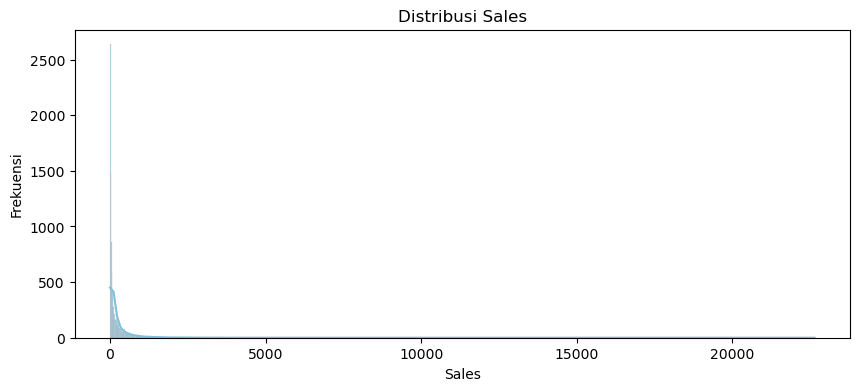

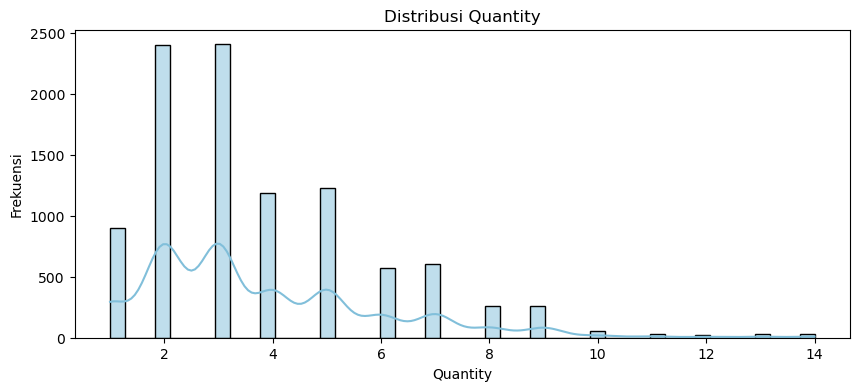

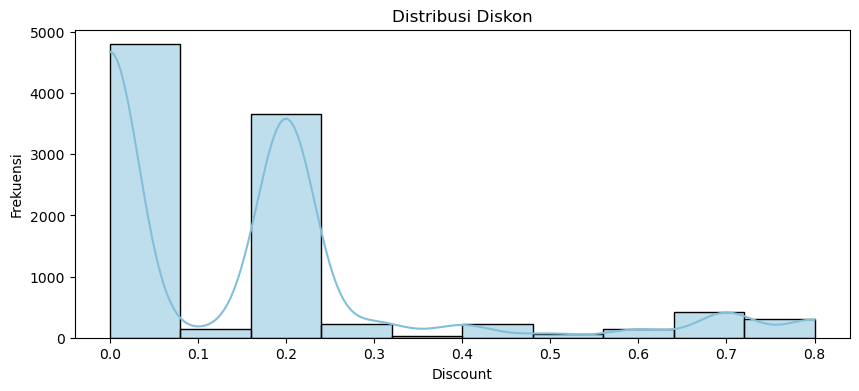

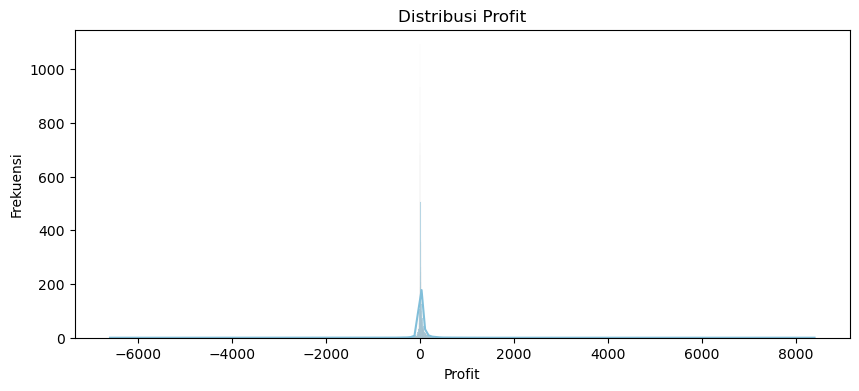

<Figure size 640x480 with 0 Axes>

In [91]:
# Visualisasi distribusi untuk kolom Sales
plt.figure(figsize=(10, 4))
sns.histplot(saas_sales['Sales'], kde=True,color='#81BFDA')
plt.title('Distribusi Sales')
plt.xlabel('Sales')
plt.ylabel('Frekuensi')
plt.show()

# Insight setelah distribusi Sales
# print("\nInsight Distribusi Sales:")
# print("- Distribusi Tidak Merata (Right-Skewed), yang menandakan bahwa sebagian besar nilai Sales berada pada rentang yang kecil (dekat dengan nol), tetapi terdapat sejumlah kecil transaksi dengan nilai Sales yang sangat tinggi.")

# Visualisasi distribusi untuk kolom Quantity
plt.figure(figsize=(10, 4))
sns.histplot(saas_sales['Quantity'], kde=True,color='#81BFDA')
plt.title('Distribusi Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frekuensi')
plt.show()

# Insight setelah distribusi Quantity
# print("\nInsight Distribusi Quantity:")
# print("- Distribusi Tidak Merata (Right-Skewed), yang menandakan puncak frekuensi tertinggi pada nilai Quantity kecil, terutama di sekitar angka 2 hingga 4.")

# Visualisasi distribusi untuk kolom Discount
plt.figure(figsize=(10, 4))
sns.histplot(saas_sales['Discount'], kde=True, bins=10,color='#81BFDA')
plt.title('Distribusi Diskon')
plt.xlabel('Discount')
plt.ylabel('Frekuensi')
plt.show()

# Insight setelah distribusi Discount
# print("\nInsight Distribusi Discount:")
# print("- Distribusi diskon memiliki dua puncak utama, yaitu pada nilai 0 (tanpa diskon) dan sekitar 0.2 (20% diskon). Hal ini menunjukkan bahwa sebagian besar transaksi tidak memberikan diskon atau memberikan diskon sekitar 20%.")


# Visualisasi distribusi untuk kolom Profit
plt.figure(figsize=(10, 4))
sns.histplot(saas_sales['Profit'], kde=True,color='#81BFDA')
plt.title('Distribusi Profit')
plt.xlabel('Profit')
plt.ylabel('Frekuensi')
plt.show()

# Insight setelah distribusi Profit
# print("\nInsight Distribusi Profit:")
# print("- Menunjukkan bahwa sebagian besar nilai Profit berada di sekitar angka 0, dengan distribusi yang memiliki ekor panjang ke kedua sisi (negatif dan positif). Ini mengindikasikan adanya variasi profit yang cukup besar, termasuk kerugian dan keuntungan tinggi.")

# Menampilkan plot
plt.tight_layout()
plt.show()

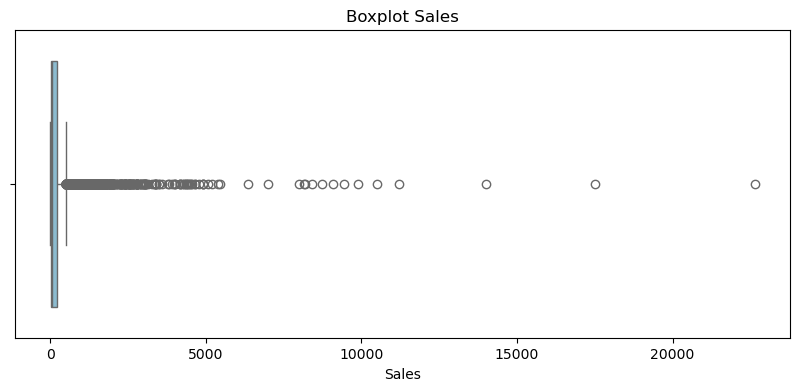

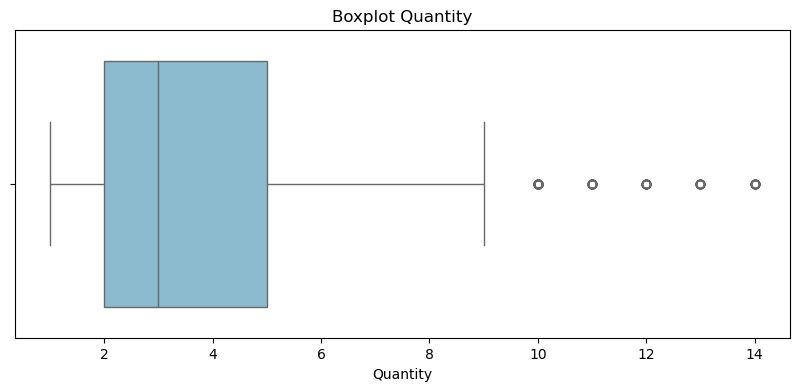

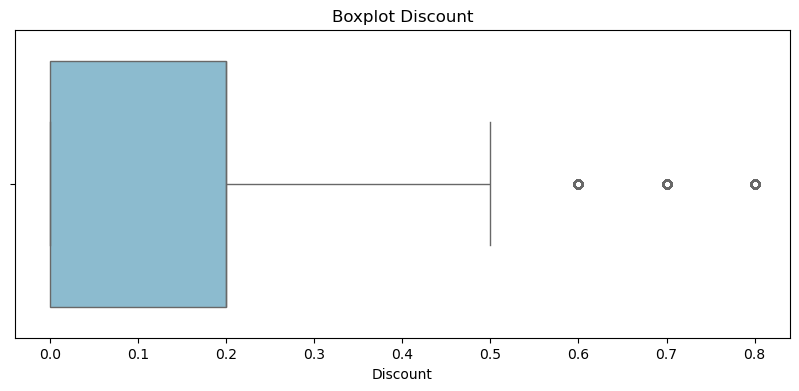

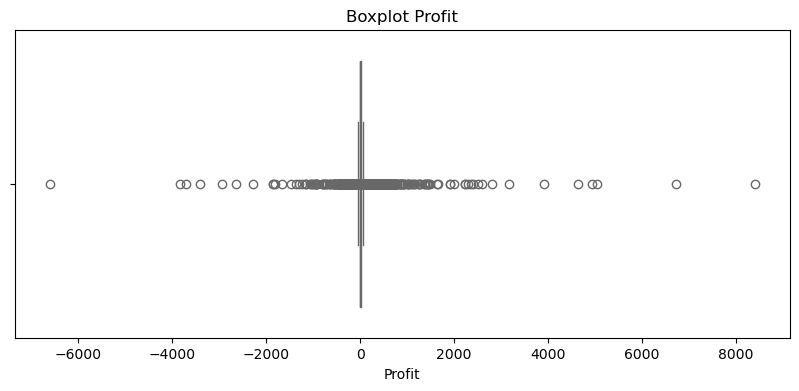

In [92]:
# Visualisasi boxplot untuk kolom Sales
plt.figure(figsize=(10, 4))
sns.boxplot(x=saas_sales['Sales'],color='#81BFDA')
plt.title('Boxplot Sales')
plt.xlabel('Sales')
plt.show()

# Visualisasi boxplot untuk kolom Quantity
plt.figure(figsize=(10, 4))
sns.boxplot(x=saas_sales['Quantity'],color='#81BFDA')
plt.title('Boxplot Quantity')
plt.xlabel('Quantity')
plt.show()

# Visualisasi boxplot untuk kolom Discount
plt.figure(figsize=(10, 4))
sns.boxplot(x=saas_sales['Discount'],color='#81BFDA')
plt.title('Boxplot Discount')
plt.xlabel('Discount')
plt.show()

# # Visualisasi boxplot untuk kolom Profit
plt.figure(figsize=(10, 4))
sns.boxplot(x=saas_sales['Profit'],color='#81BFDA')
plt.title('Boxplot Profit')
plt.xlabel('Profit')
plt.show()

# plt.tight_layout()
# plt.show()

### **Insight :**
- Distribusi Tidak Merata (Right-Skewed), yang menandakan bahwa sebagian besar nilai Sales berada pada rentang yang kecil (dekat dengan nol), tetapi terdapat sejumlah kecil transaksi dengan nilai Sales yang sangat tinggi.
- Distribusi Tidak Merata (Right-Skewed), yang menandakan puncak frekuensi tertinggi pada nilai Quantity kecil, terutama di sekitar angka 2 hingga 4.
- Distribusi diskon memiliki dua puncak utama, yaitu pada nilai 0 (tanpa diskon) dan sekitar 0.2 (20% diskon). Hal ini menunjukkan bahwa sebagian besar transaksi tidak memberikan diskon atau memberikan diskon sekitar 20%.
- Menunjukkan bahwa sebagian besar nilai Profit berada di sekitar angka 0, dengan distribusi yang memiliki ekor panjang ke kedua sisi (negatif dan positif). Ini mengindikasikan adanya variasi profit yang cukup besar, termasuk kerugian dan keuntungan tinggi.

## **3. Korelasi antar variabel numerik**

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


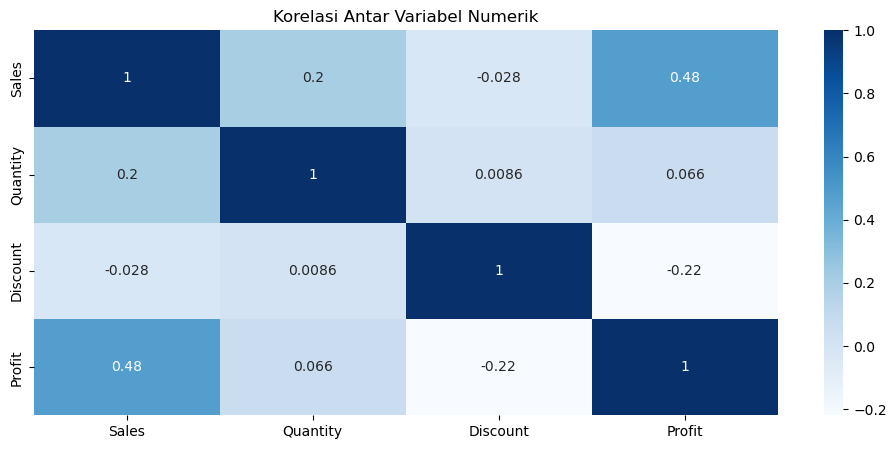

In [95]:
# Memilih Hanya Kolom Numerik untuk Perhitungan Korelasi
numeric_sales = saas_sales[['Sales', 'Quantity', 'Discount', 'Profit']]

# Menampilkan matriks korelasi
correlation_matrix = numeric_sales.corr()
print(correlation_matrix)

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap= 'Blues')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

### **Insight :**
- Sales dan Profit (Korelasi Positif, 0.48):
Terdapat hubungan positif yang cukup kuat antara Sales dan Profit. Ini menunjukkan bahwa ketika Sales meningkat, Profit cenderung meningkat pula. Namun, korelasi tidak terlalu tinggi, yang  disebabkan oleh pengaruh variabel lain seperti diskon atau biaya.

- Sales dan Quantity (Korelasi Positif, 0.20):
Korelasi positif yang lemah antara Sales dan Quantity menunjukkan bahwa peningkatan jumlah unit terjual tidak selalu berkorelasi langsung dengan peningkatan nilai penjualan. Ini bisa terjadi karena variasi harga produk.

- Discount dan Profit (Korelasi Negatif, -0.22):
Korelasi negatif antara Discount dan Profit menunjukkan bahwa semakin tinggi diskon yang diberikan, semakin rendah profit yang dihasilkan. Hal ini sesuai dengan ekspektasi karena diskon mengurangi margin keuntungan.

- Quantity dan Profit (Korelasi Positif, 0.066):
Korelasi yang sangat lemah antara Quantity dan Profit menunjukkan bahwa jumlah barang yang terjual tidak memiliki pengaruh yang signifikan terhadap keuntungan, karena faktor diskon atau harga produk yang bervariasi.

- Discount dan Sales (Korelasi Negatif, -0.028):
Hubungan negatif yang sangat lemah antara Discount dan Sales menunjukkan bahwa diskon tidak secara signifikan memengaruhi total nilai penjualan. Hal ini bisa mengindikasikan bahwa diskon diberikan pada produk dengan nilai lebih kecil atau pelanggan tidak terlalu sensitif terhadap diskon.

### **4. Analisis Data Kategori**

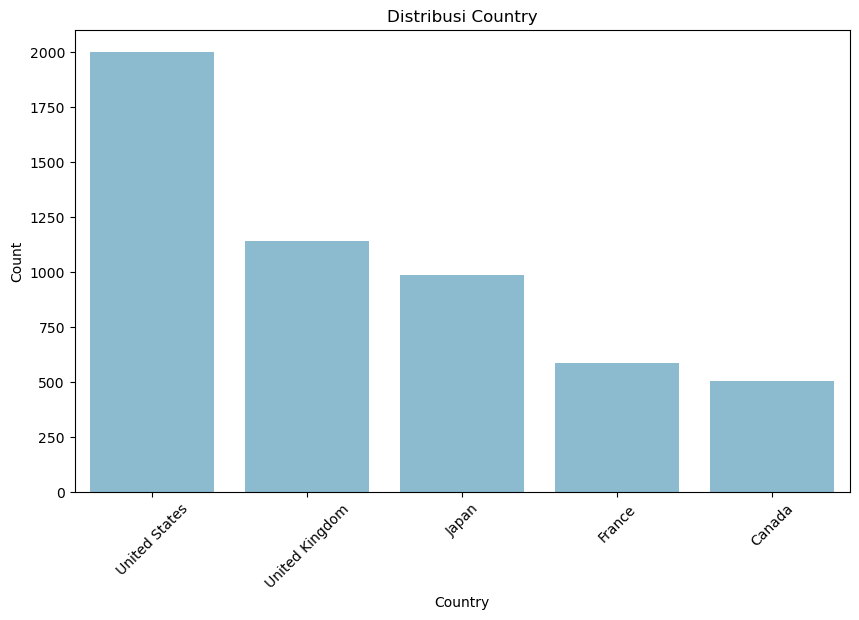

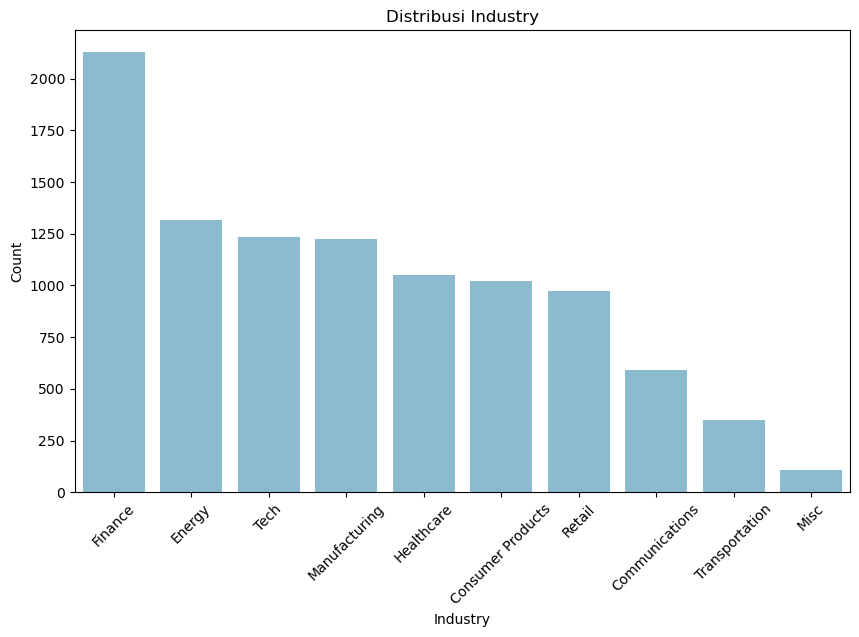

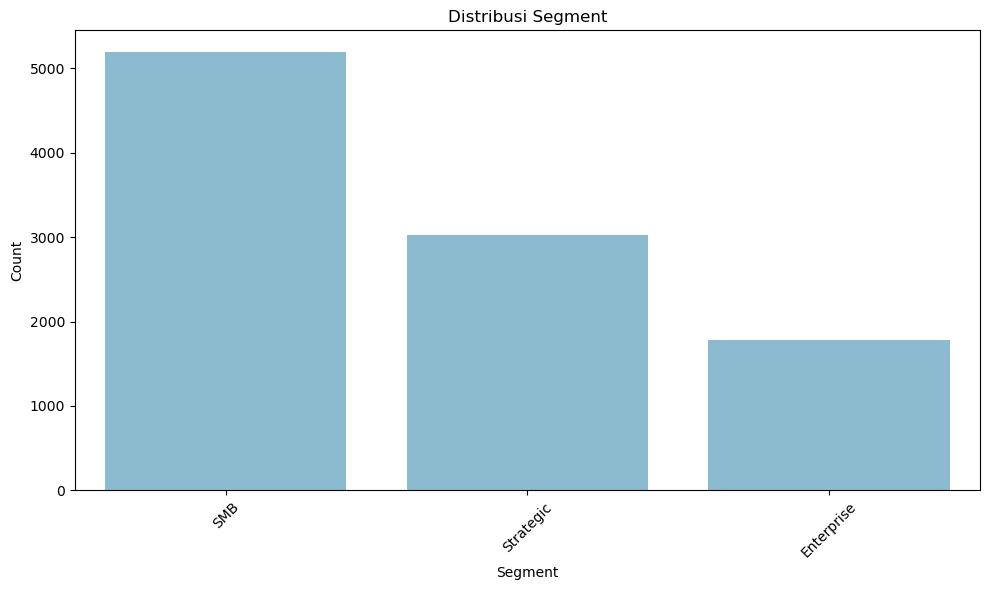

In [98]:
# Hitung distribusi kategori

# Hitung distribusi kategori Country
country_counts = saas_sales['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
top_countries = country_counts.head(5)

# Hitung distribusi kategori Industry
industry_counts = saas_sales['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']

# Hitung distribusi kategori Segment
segment_counts = saas_sales['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Visualisasi
# plt.figure(figsize=(10, 6))

# Visualisasi Distribusi Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', data=top_countries,color='#81BFDA')
plt.title('Distribusi Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Visualisasi Distribusi Industry
plt.figure(figsize=(10, 6))
sns.barplot(x='Industry', y='Count', data=industry_counts,color='#81BFDA')
plt.title('Distribusi Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Visualisasi Distribusi Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Count', data=segment_counts,color='#81BFDA')
plt.title('Distribusi Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Menampilkan Plot
plt.tight_layout()
plt.show()

In [99]:
# Menampilkan daftar distribusi dalam tabel
print("\nDistribusi Top 5 Country:")
print(top_countries)
print("\nDistribusi Industry:")
print(industry_counts)
print("\nDistribusi Segment:")
print(segment_counts)


Distribusi Top 5 Country:
          Country  Count
0   United States   2001
1  United Kingdom   1141
2           Japan    985
3          France    587
4          Canada    506

Distribusi Industry:
            Industry  Count
0            Finance   2127
1             Energy   1316
2               Tech   1236
3      Manufacturing   1222
4         Healthcare   1049
5  Consumer Products   1021
6             Retail    972
7     Communications    593
8     Transportation    351
9               Misc    107

Distribusi Segment:
      Segment  Count
0         SMB   5191
1   Strategic   3020
2  Enterprise   1783


### **Insight Barplot  :**

- Dari ketiga barplot tersebut, dapat dilihat bahwa negara , segmen pelanggan, dan industri tertentu berkontribusi lebih besar
  terhadap penjualan dibandingkan yang lain.
  
- Berdasarkan barplot pertama negara, United States mendominasi dengan 2001 diikuti United Kingdom (1141) dan Japan (985).
  
- Berdasarkan barplot kedua industri, Finance memiliki jumlah tertinggi (2127) diikuti Energy (1316) dan Tech (1236).
  
- Berdasarkan barplot ketiga segmen pelanggan, SMB mendominasi dengan 5191 data diikuti Strategic (3020) dan yang terakhir Enterprise (1783).

`1. Total penjualan dan total keuntungan berdasarkan analisis kontribusi produk, negara, segmen pelanggan, dan industri`

**`Analisis Penjualan dan Profit Produk Berdasarkan Negara`**

In [103]:
# Analisis Total Penjualan dan Profit Berdasarkan Negara 
negara_penjualan_profit = saas_sales.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Profit', ascending=False).reset_index()
print(negara_penjualan_profit)

                 Country        Sales      Profit
0          United States  457687.6315  76381.3871
1         United Kingdom  313169.8810  74989.0891
2                 Canada  138641.2700  33402.6517
3                 Brazil   76269.6140  24463.1876
4                  Spain   70636.7200  18597.9504
5                  India   53555.3600  18382.9363
6                Finland   49095.8400  16250.0433
7             Luxembourg   29863.1500  10823.1874
8                Ireland   34298.1400  10249.1561
9            Philippines   27451.0690   9977.3748
10             Argentina   35764.3120   9772.9138
11                 Italy   32114.6100   8401.8004
12                Norway   22627.9560   7285.6293
13                 China   23705.5230   7031.1788
14           South Korea   28634.4340   6785.5016
15                Poland   22205.1500   6436.2105
16              Portugal   19510.6400   5786.8253
17             Singapore   19683.3900   4853.9560
18  United Arab Emirates   11678.1300   4008.6871


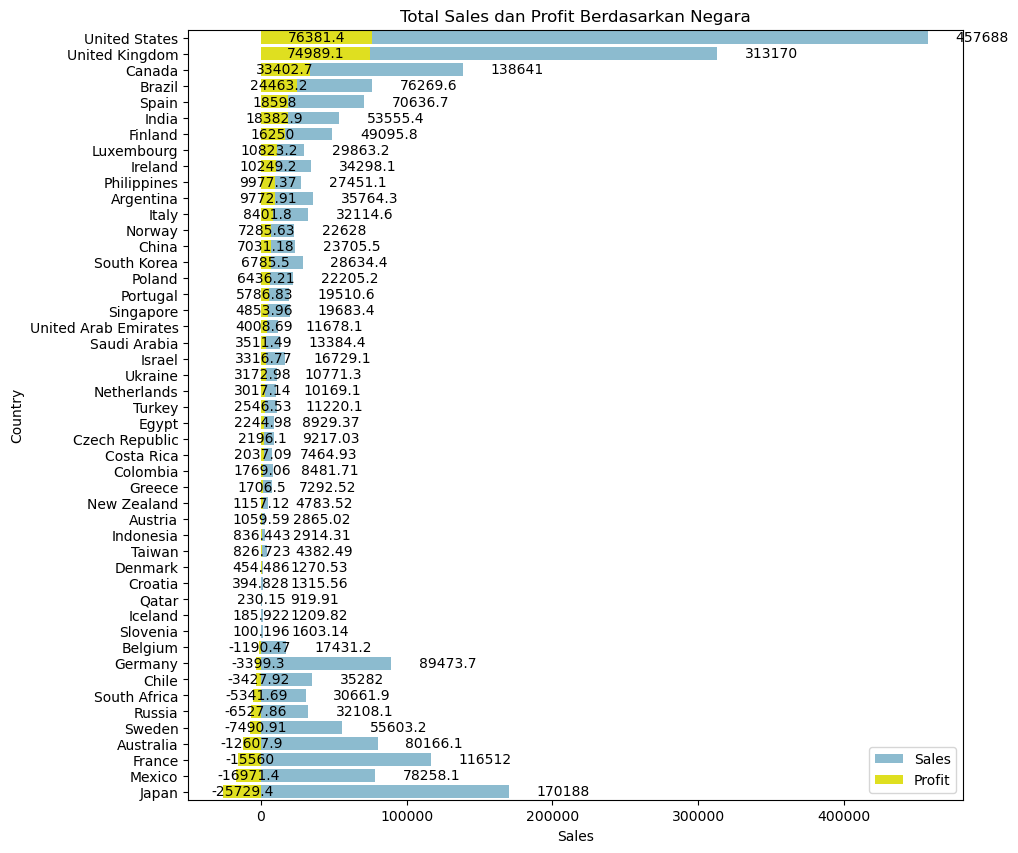

In [173]:
# Visualisasi Penjualan dan Profit Berdasarkan Negara 
plt.figure(figsize=(10, 10))
sales = sns.barplot(x= 'Sales', y= 'Country', data = negara_penjualan_profit, color= '#81BFDA', label= 'Sales', dodge= False)
sales.bar_label(sales.containers[0], padding= 20)
profit = sns.barplot(x= 'Profit', y= 'Country', data = negara_penjualan_profit, color= 'Yellow', label= 'Profit', dodge= False)
plt.title('Total Sales dan Profit Berdasarkan Negara')
profit.bar_label(profit.containers[1], label_type='center')
plt.legend()
plt.show()

`Negara dengan Penjualan dan Profit Tinggi`

In [106]:
# Membuat analisis kontribusi per negara dan produk
country_product_analysis = saas_sales.groupby(['Country', 'Product']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Filter data untuk negara US, UK, dan Kanada
negara_teratas = ['United States', 'United Kingdom', 'Canada']
data_terfilter = country_product_analysis[country_product_analysis['Country'].isin(negara_teratas)]

# Urutkan data berdasarkan Negara dan Total Penjualan
data_terfilter = data_terfilter.sort_values(by=['Country', 'Total_Sales'], ascending=[True, False])

# Tampilkan data terfilter
print(data_terfilter)

            Country                     Product  Total_Sales  Total_Profit
63           Canada              ContactMatcher   43218.4480    10937.8014
60           Canada                     Alchemy   20249.8300     9442.4242
65           Canada                  FinanceHub   17540.7620     1253.4756
64           Canada                Data Smasher   15119.1600     4263.2736
67           Canada      Marketing Suite - Gold   13163.2000     1731.6766
71           Canada              Site Analytics    9101.5680      698.5820
61           Canada             Big Ol Database    6066.1520      615.0637
73           Canada                     Support    3802.0800     1615.6826
69           Canada         SaaS Connector Pack    3426.5000     1054.8443
66           Canada             Marketing Suite    3144.4600      570.0054
68           Canada                     OneView    1969.3500      591.8608
62           Canada              ChatBot Plugin    1063.8400      320.1679
70           Canada  SaaS

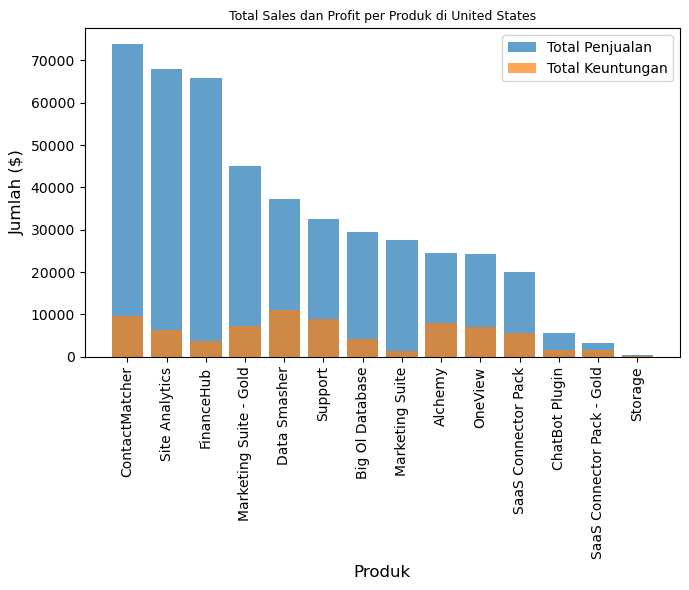

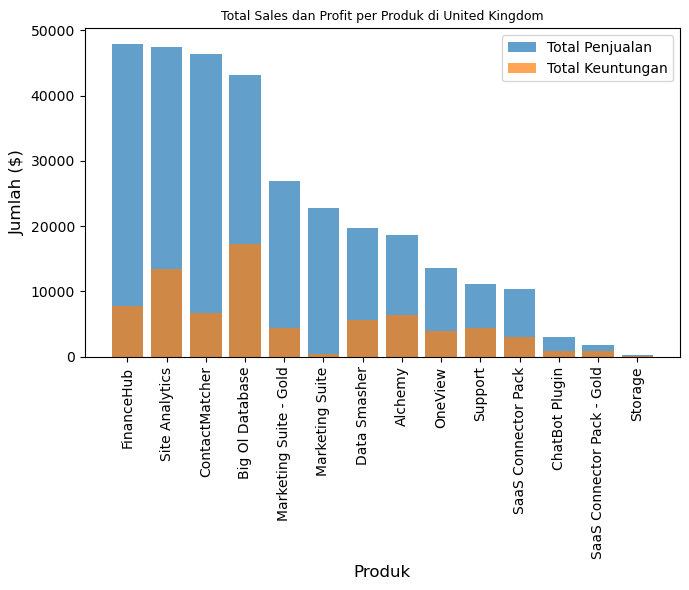

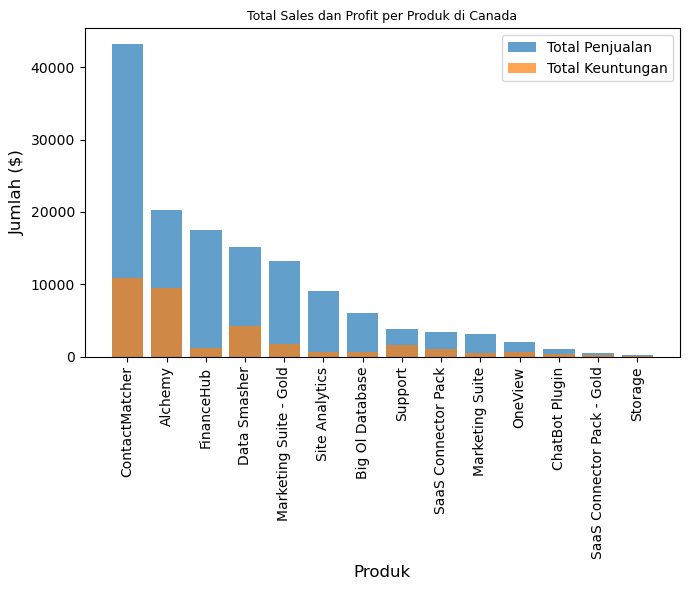

In [175]:
# Definisikan ulang data_terfilter dari langkah sebelumnya untuk kejelasan
data_terfilter = country_product_analysis[
    country_product_analysis['Country'].isin(['United States', 'United Kingdom', 'Canada'])
].sort_values(by=['Country', 'Total_Sales'], ascending=[True, False])

# Buat grafik batang untuk Total Penjualan dan Total Keuntungan per Produk di setiap Negara
for negara in ['United States', 'United Kingdom', 'Canada']:
    data_negara = data_terfilter[data_terfilter['Country'] == negara]
    plt.figure(figsize=(7, 6))
    plt.bar(data_negara['Product'], data_negara['Total_Sales'], label='Total Penjualan', alpha=0.7)
    plt.bar(data_negara['Product'], data_negara['Total_Profit'], label='Total Keuntungan', alpha=0.7)
    plt.title(f'Total Sales dan Profit per Produk di {negara}', fontsize=9)
    plt.xlabel('Produk', fontsize=12)
    plt.ylabel('Jumlah ($)', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

**Interpretasi:**

`Negara dengan Penjualan dan Profit Tinggi`
- Negara seperti Amerika Serikat, Inggris, dan Kanada menunjukkan angka penjualan tinggi dan profit yang signifikan.
    + Amerika Serikat: Fokus pada produk unggulan seperti ContactMatcher dan Site Analytics dengan meningkatkan kampanye pemasaran. Perbaiki margin keuntungan produk dengan penjualan tinggi tetapi profit rendah, seperti Big Ol Database.
    + Inggris: Pertahankan dominasi produk seperti FinanceHub dan Site Analytics melalui pengembangan fitur tambahan. Revisi strategi harga untuk produk dengan profit rendah, seperti Support dan OneView.
    + Kanada: Tingkatkan promosi untuk produk terpopuler seperti ContactMatcher. Optimalkan produk potensial seperti Site Analytics dan Alchemy dengan pelatihan tambahan bagi tim penjualan.

`Negara dengan Penjualan Tinggi tetapi Profit Negatif`

In [111]:
# Membuat analisis kontribusi per negara dan produk
country_product_analysis = saas_sales.groupby(['Country', 'Product']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Filter data untuk negara US, UK, dan Kanada
negara_profit_rendah = ['Australia','France','Japan','Mexico']
data_terfilter = country_product_analysis[country_product_analysis['Country'].isin(negara_profit_rendah)]

# Urutkan data berdasarkan Negara dan Total Penjualan
data_terfilter = data_terfilter.sort_values(by=['Country', 'Total_Sales'], ascending=[True, False])

# Tampilkan data terfilter
print(data_terfilter)

       Country                     Product  Total_Sales  Total_Profit
24   Australia              Site Analytics   16771.7840     1682.6887
18   Australia                  FinanceHub   14788.0500    -1501.2333
16   Australia              ContactMatcher   11089.2160   -11514.0689
20   Australia      Marketing Suite - Gold    9080.3280     -257.4584
13   Australia                     Alchemy    5919.8880     1831.9666
17   Australia                Data Smasher    5535.6960      981.8644
19   Australia             Marketing Suite    4282.6980     -555.8726
14   Australia             Big Ol Database    3756.3050      326.0395
26   Australia                     Support    3633.9680     1197.1039
22   Australia         SaaS Connector Pack    2877.9760    -2631.9766
21   Australia                     OneView     974.7200    -2482.4187
15   Australia              ChatBot Plugin     930.0320      138.9541
23   Australia  SaaS Connector Pack - Gold     384.1040      132.5294
25   Australia      

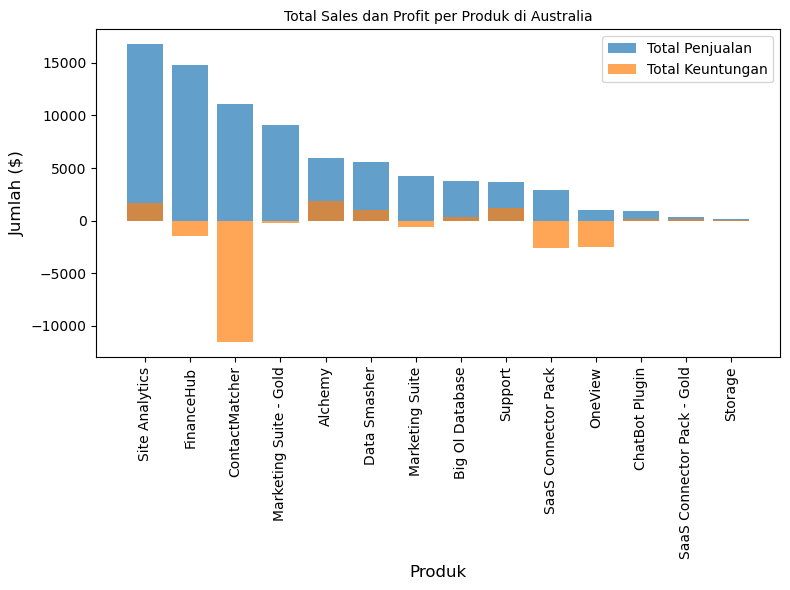

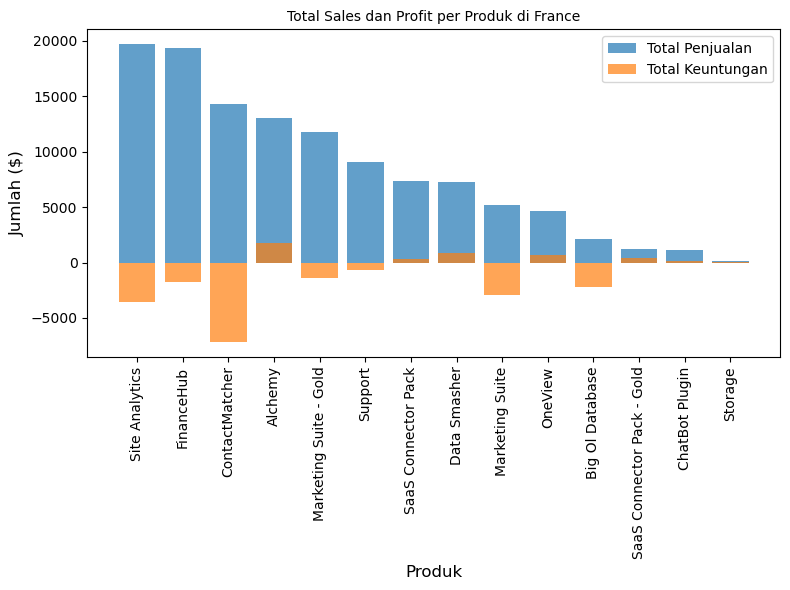

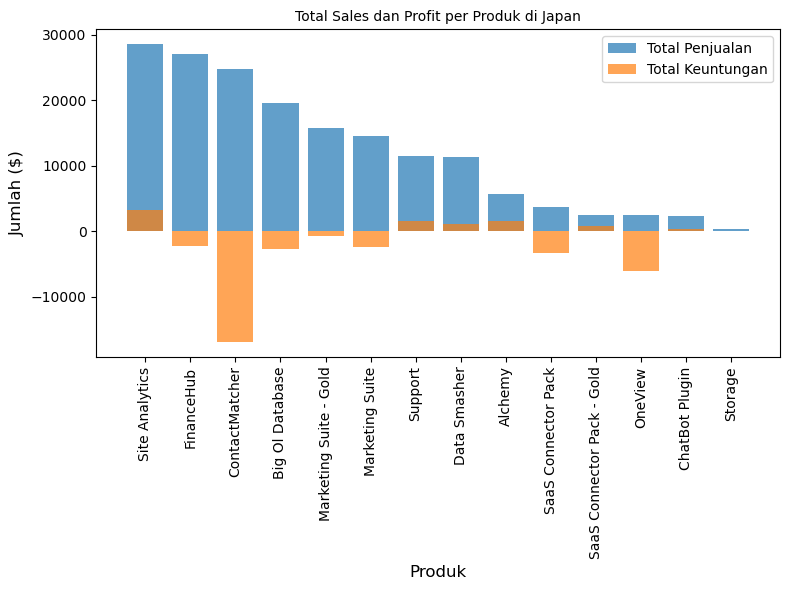

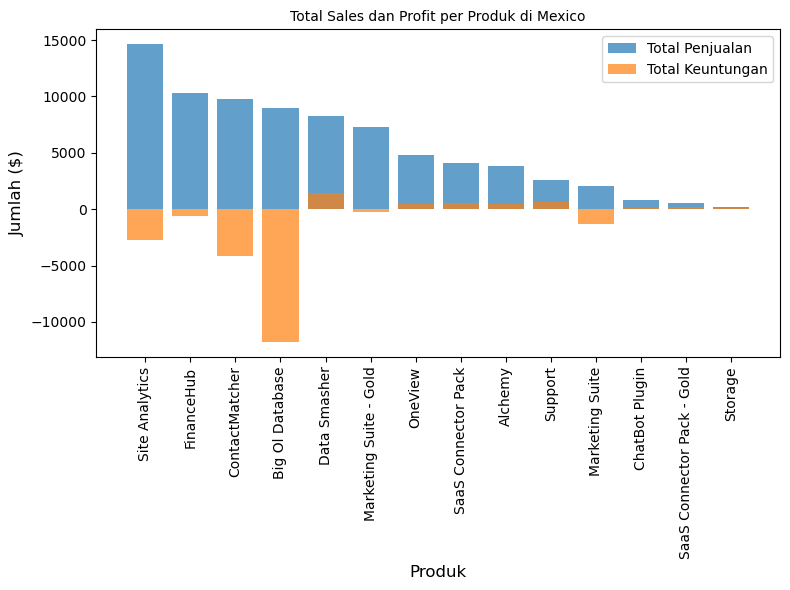

In [177]:
# Definisikan ulang data_terfilter dari langkah sebelumnya untuk kejelasan
data_terfilter = country_product_analysis[
    country_product_analysis['Country'].isin(['Australia','France','Japan','Mexico'])
].sort_values(by=['Country', 'Total_Sales'], ascending=[True, False])

# Buat grafik batang untuk Total Penjualan dan Total Keuntungan per Produk di setiap Negara
for negara in ['Australia','France','Japan','Mexico']:
    data_negara = data_terfilter[data_terfilter['Country'] == negara]
    plt.figure(figsize=(8, 6))
    plt.bar(data_negara['Product'], data_negara['Total_Sales'], label='Total Penjualan', alpha=0.7)
    plt.bar(data_negara['Product'], data_negara['Total_Profit'], label='Total Keuntungan', alpha=0.7)
    plt.title(f'Total Sales dan Profit per Produk di {negara}', fontsize=10)
    plt.xlabel('Produk', fontsize=12)
    plt.ylabel('Jumlah ($)', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

**Interpretasi:**

`Negara dengan Penjualan Tinggi tetapi Profit Negatif`

- Australia:
    + Produk seperti Site Analytics dan FinanceHub menunjukkan penjualan yang tinggi, namun hanya Site Analytics yang memberikan kontribusi positif terhadap keuntungan. Ini menunjukkan perlunya optimalisasi profitabilitas produk seperti FinanceHub.
    + ContactMatcher memiliki penjualan yang cukup tinggi, tetapi memberikan margin keuntungan negatif yang signifikan. Ini mungkin disebabkan oleh tingginya biaya operasional atau harga jual yang tidak kompetitif.
    + Produk seperti Alchemy dan Data Smasher memberikan kontribusi margin keuntungan yang tinggi, meskipun total penjualannya lebih rendah dibandingkan produk lain. Hal ini menunjukkan potensi untuk meningkatkan penjualan produk ini melalui strategi pemasaran yang lebih efektif.
- Prancis:
    + Site Analytics dan ContactMatcher mencatat total penjualan tertinggi, tetapi keduanya memberikan kontribusi keuntungan negatif yang besar. Hal ini menunjukkan bahwa meskipun produk tersebut diminati di pasar, biaya operasional atau strategi harga perlu diperbaiki.
    + FinanceHub juga memiliki penjualan tinggi, tetapi margin keuntungan masih negatif, meskipun lebih kecil dibandingkan dua produk sebelumnya.
    + Alchemy memiliki margin keuntungan positif yang signifikan, menjadikannya salah satu produk yang layak untuk diprioritaskan promosi untuk meningkatkan penjualan lebih lanjut.
    + SaaS Connector Pack dan Data Smasher juga memberikan kontribusi keuntungan positif meskipun dengan total penjualan yang lebih rendah. Produk ini memiliki potensi untuk meningkatkan profitabilitas jika penjualannya ditingkatkan.
- Jepang:
    + Site Analytics mencatat penjualan tertinggi dengan kontribusi keuntungan positif yang signifikan. Ini menunjukkan bahwa produk ini adalah salah satu pendorong utama profitabilitas di pasar Jepang.
    + Support dan Data Smasher juga memberikan kontribusi positif terhadap keuntungan meskipun penjualannya lebih rendah dibandingkan Site Analytics.
    + ContactMatcher mencatat penjualan tinggi tetapi menyumbang margin keuntungan negatif yang sangat besar.
    + FinanceHub dan Big Ol Database juga mengalami margin keuntungan negatif meskipun memiliki penjualan yang signifikan.
- Meksiko:
    + Site Analytics mencatat penjualan tertinggi, tetapi memiliki margin keuntungan negatif yang cukup besar. Hal ini menunjukkan tingginya biaya operasional atau strategi harga yang kurang optimal.
    + ContactMatcher dan Big Ol Database juga memiliki penjualan yang signifikan, tetapi kontribusi margin keuntungan sangat negatif, khususnya Big Ol Database yang mencatat kerugian terbesar.
    + SaaS Connector Pack - Gold dan ChatBot Plugin memberikan kontribusi margin positif, meskipun penjualannya rendah. Produk ini memiliki potensi untuk ditingkatkan melalui strategi pemasaran yang lebih baik.
    + Alchemy dan Support juga menunjukkan keuntungan yang positif, namun dengan volume penjualan yang tidak setinggi produk lainnya.

**`Analisis Total Penjualan dan Profit Produk Berdasarkan Segmen`**

In [116]:
segment_penjualan_profit = saas_sales.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Profit', ascending=False).reset_index()
segment_penjualan_profit

,Segment,Sales,Profit
0,SMB,1.161401e+06,134119.2092
1,Strategic,7.061464e+05,91979.1340
2,Enterprise,4.296531e+05,60298.6785


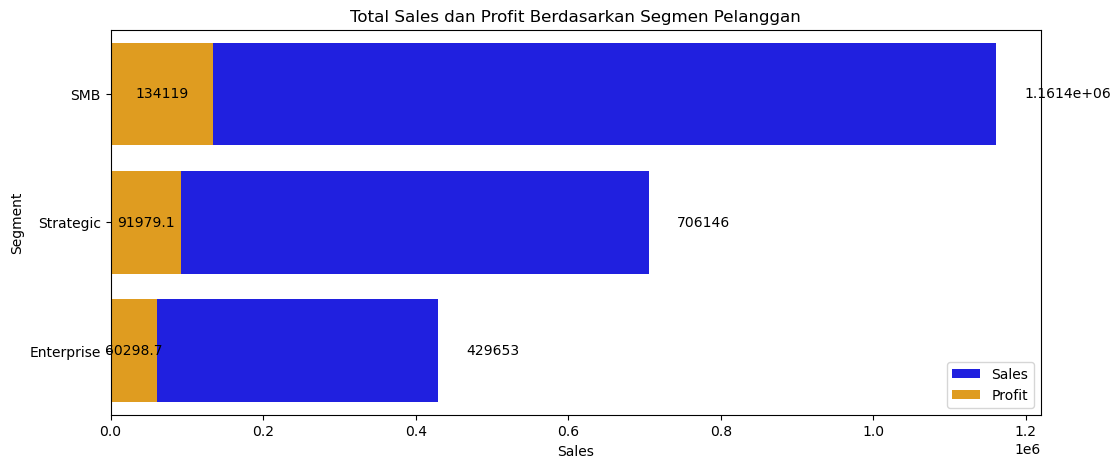

In [179]:
plt.figure(figsize=(12, 5))
sales = sns.barplot(x= 'Sales', y= 'Segment', data = segment_penjualan_profit, color= 'blue', label= 'Sales', dodge= False)
sales.bar_label(sales.containers[0], padding= 20)
profit = sns.barplot(x= 'Profit', y= 'Segment', data = segment_penjualan_profit, color= 'Orange', label= 'Profit', dodge= False)
profit.bar_label(profit.containers[1], label_type='center')
plt.title('Total Sales dan Profit Berdasarkan Segmen Pelanggan')
plt.legend()
plt.show()

In [118]:
# Membuat analisis kontribusi segment dan produk
segmen_product_analysis = saas_sales.groupby(['Segment', 'Product']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Tampilkan data terfilter
print(segmen_product_analysis)

       Segment                     Product  Total_Sales  Total_Profit
0   Enterprise                     Alchemy   32879.5740    12543.8354
1   Enterprise             Big Ol Database   49419.0510      540.6761
2   Enterprise              ChatBot Plugin    4276.4140     1068.8382
3   Enterprise              ContactMatcher   69851.4305     2757.9013
4   Enterprise                Data Smasher   32084.5160     8493.2327
5   Enterprise                  FinanceHub   58120.8870     5719.6162
6   Enterprise             Marketing Suite   12241.3430      324.6320
7   Enterprise      Marketing Suite - Gold   43560.2080     5043.6013
8   Enterprise                     OneView   18123.8970     3726.1820
9   Enterprise         SaaS Connector Pack   17083.8520     1631.5132
10  Enterprise  SaaS Connector Pack - Gold    2762.5860     1128.5351
11  Enterprise              Site Analytics   68920.8760     8912.3963
12  Enterprise                     Storage     560.0480      120.8144
13  Enterprise      

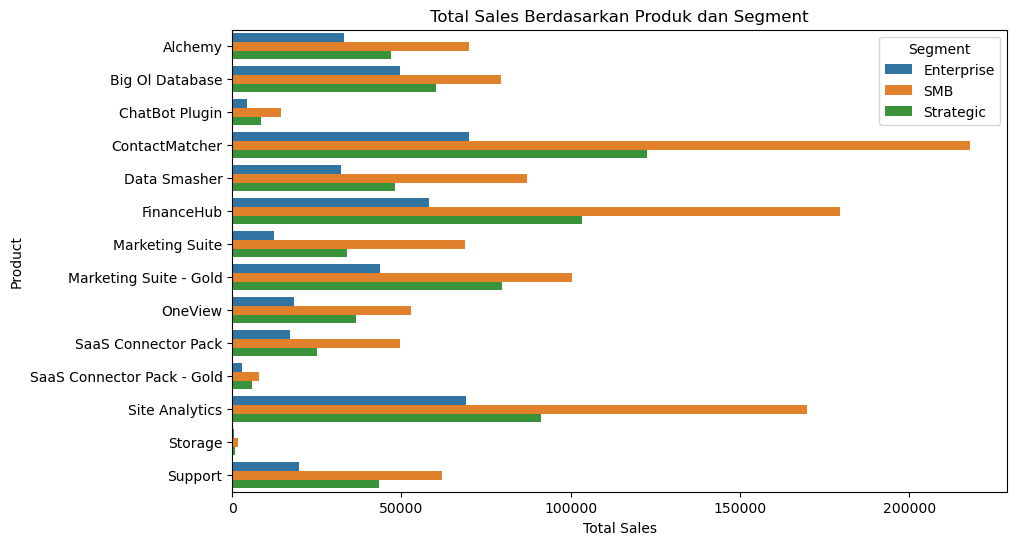

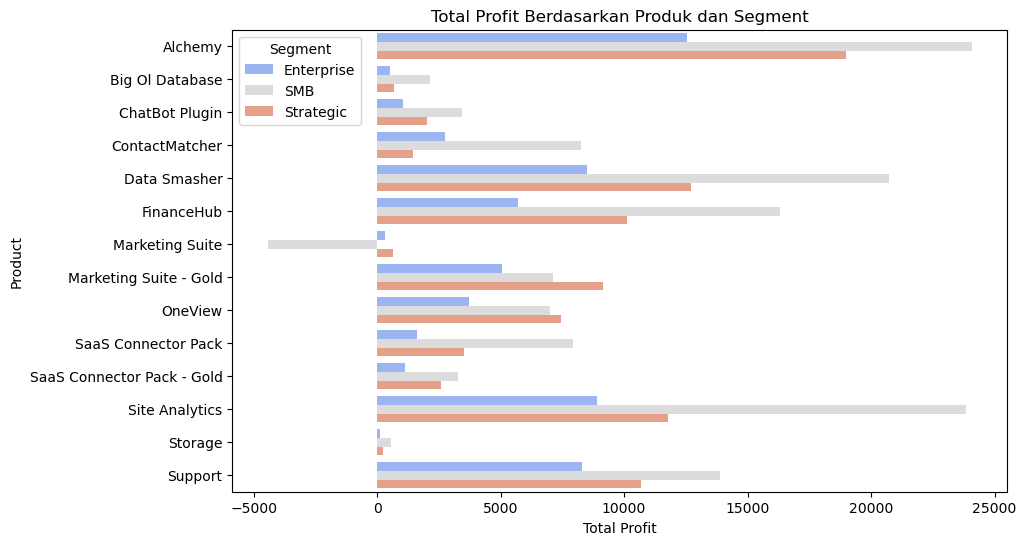

In [119]:
# Visualisasi Total Sales Berdasarkan Produk dan Segment
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Sales',
    y='Product',
    hue='Segment',
    data=segmen_product_analysis,
    palette='tab10'
)
plt.title('Total Sales Berdasarkan Produk dan Segment')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.legend(title='Segment')
plt.show()

# Visualisasi Total Profit Berdasarkan Produk dan Segment
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Profit',
    y='Product',
    hue='Segment',
    data=segmen_product_analysis,
    palette='coolwarm'
)
plt.title('Total Profit Berdasarkan Produk dan Segment')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.legend(title='Segment')
plt.show()

**Interpretasi:**

Segmen pelanggan **SMB** mencatat total penjualan tertinggi, diikuti oleh **Strategic** di posisi kedua, dan **Enterprise** di posisi ketiga dengan kontribusi lebih kecil.

`Analisis Total Penjualan dan Profit Produk Berdasarkan Segmen`
- Enterprise:
    + Produk Unggulan: ContactMatcher dan Site Analytics mencatatkan penjualan dan profit tertinggi.
    + Produk Bermasalah: Marketing Suite memiliki kontribusi kecil terhadap penjualan dan profit.
- SMB (Small and Medium Business):
    + Produk Unggulan: ContactMatcher, Site Analytics, dan FinanceHub adalah kontributor utama untuk penjualan dan profit.
    + Produk Bermasalah: Marketing Suite mencatatkan kerugian meskipun memiliki penjualan tinggi.
- Strategic:
    + Produk Unggulan: Site Analytics memberikan kontribusi positif terhadap profit.
    + Produk Bermasalah: Marketing Suite dan beberapa produk lain mencatat profit negatif meskipun ada penjualan signifikan.

**`Analisis Total Penjualan dan Profit Produk Berdasarkan Industry`**

In [123]:
industri_penjualan_profit = saas_sales.groupby('Industry').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Profit', ascending=False).reset_index()
industri_penjualan_profit

,Industry,Sales,Profit
0,Finance,474150.4844,50348.9696
1,Energy,304644.1409,45282.3137
2,Manufacturing,295192.3812,38413.1064
3,Consumer Products,224044.1422,37018.0077
4,Healthcare,273183.2882,31969.0932
5,Retail,223072.0720,30207.8208
6,Tech,263169.0277,24615.0436
7,Communications,120962.2365,13976.3410
8,Transportation,90191.3276,7402.6967
9,Misc,28591.7596,7163.6290


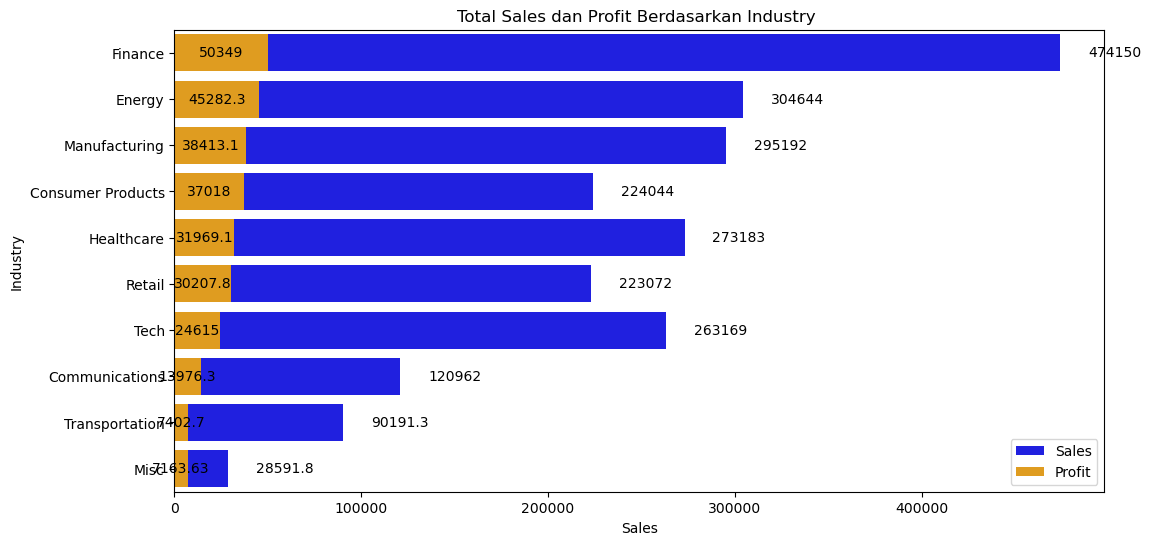

In [181]:
plt.figure(figsize=(12, 6))
sales = sns.barplot(x= 'Sales', y= 'Industry', data = industri_penjualan_profit, color= 'blue', label= 'Sales', dodge= False)
sales.bar_label(sales.containers[0], padding= 20)
profit = sns.barplot(x= 'Profit', y= 'Industry', data = industri_penjualan_profit, color= 'Orange', label= 'Profit', dodge= False)
profit.bar_label(profit.containers[1], label_type='center')
plt.title('Total Sales dan Profit Berdasarkan Industry')
plt.legend()
plt.legend()
plt.show()

In [183]:
# Atur tampilan agar semua baris dan kolom terlihat
pd.set_option('display.max_rows', None)  # Tampilkan semua baris
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom

# Membuat analisis kontribusi industri dan produk
industri_product_analysis = saas_sales.groupby(['Industry', 'Product']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Tampilkan data terfilter
print(industri_product_analysis)

              Industry                     Product  Total_Sales  Total_Profit
0       Communications             Big Ol Database    9084.1530     2510.7217
1       Communications              ChatBot Plugin    1135.2260      257.7223
2       Communications              ContactMatcher   27642.3535      817.7196
3       Communications                Data Smasher   13194.0980     3568.4677
4       Communications                  FinanceHub   16881.0640      851.0501
5       Communications             Marketing Suite    3390.9660     -451.5362
6       Communications      Marketing Suite - Gold   11172.9800     1129.4585
7       Communications                     OneView    5375.6500      673.5983
8       Communications         SaaS Connector Pack    5883.0940      747.1012
9       Communications  SaaS Connector Pack - Gold    1039.1620      452.8960
10      Communications              Site Analytics   19270.1680     1754.2020
11      Communications                     Storage     225.7380 

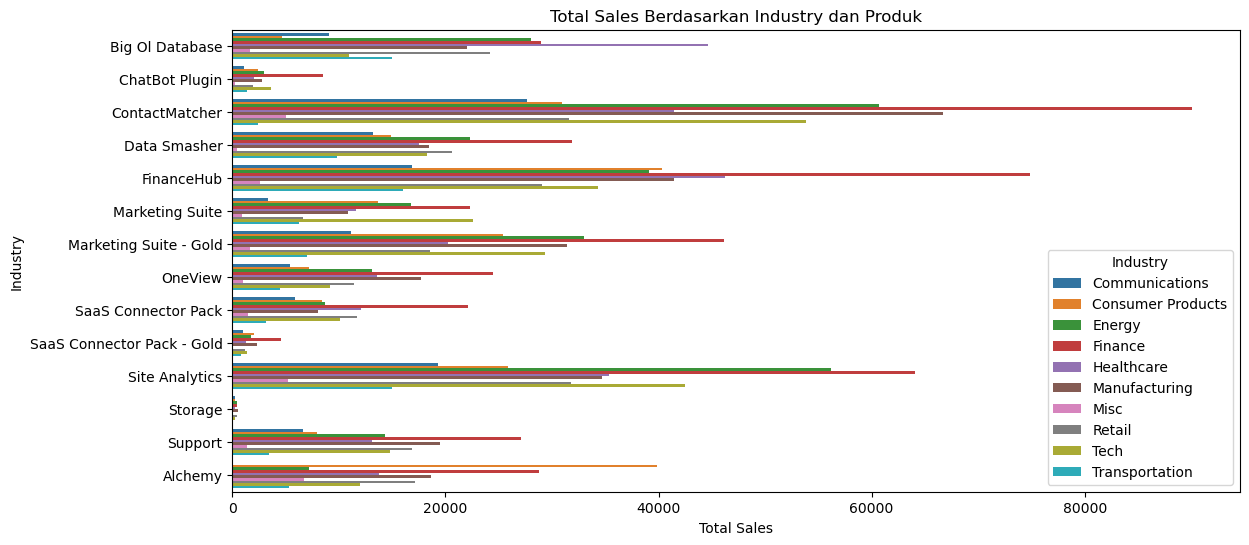

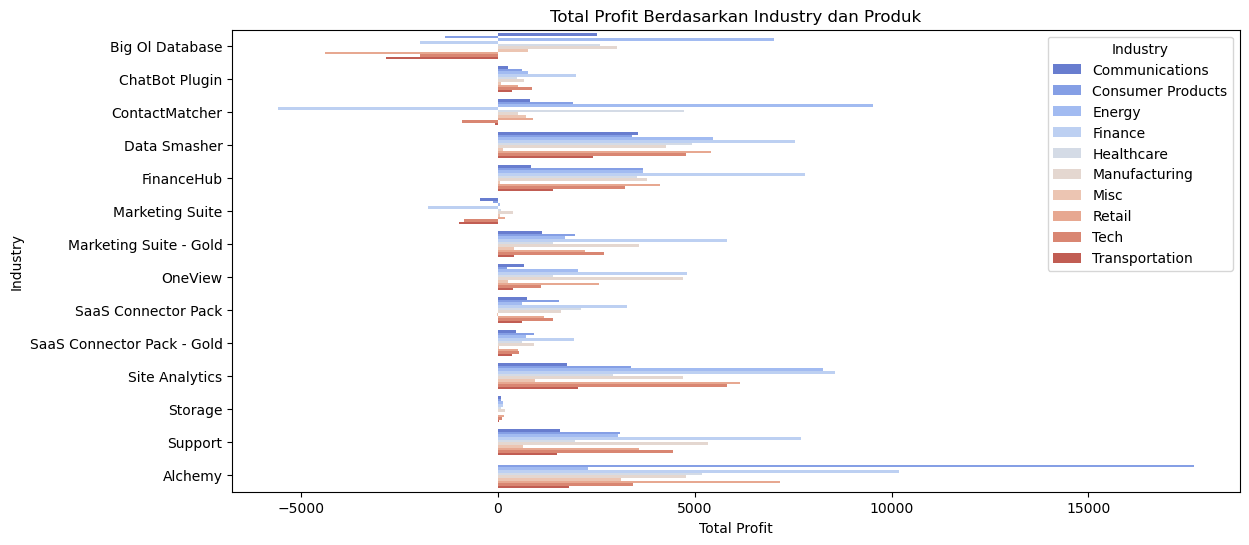

In [187]:
# Visualisasi Total Sales Berdasarkan Industri dan Segment
plt.figure(figsize=(13, 6))
sns.barplot(
    x='Total_Sales',
    y='Product',
    hue='Industry',
    data=industri_product_analysis,
    palette='tab10'
)
plt.title('Total Sales Berdasarkan Industry dan Produk')
plt.xlabel('Total Sales')
plt.ylabel('Industry')
plt.legend(title='Industry')
plt.show()

# Visualisasi Total Profit Berdasarkan Produk dan Segment
plt.figure(figsize=(13, 6))
sns.barplot(
    x='Total_Profit',
    y='Product',
    hue='Industry',
    data=industri_product_analysis,
    palette='coolwarm'
)
plt.title('Total Profit Berdasarkan Industry dan Produk')
plt.xlabel('Total Profit')
plt.ylabel('Industry')
plt.legend(title='Industry')
plt.show()

**Interpretasi:**

Industri **Finance** memimpin dengan total penjualan tertinggi, diikuti oleh **Energy** yang menempati posisi kedua dengan kontribusi signifikan. **Manufacturing** berada di peringkat ketiga, melengkapi tiga besar industri dengan kontribusi penjualan terbesar.

`Analisis Total Penjualan dan Profit Produk Berdasarkan Industry`

- Communications
  
Industri ini menunjukkan kontribusi penjualan yang baik, dengan profit yang cukup stabil. Produk seperti Site Analytics dan Data Smasher kemungkinan menjadi pendorong utama karena kinerjanya yang konsisten dalam mencatatkan keuntungan.

- Consumer Products
  
Penjualan di industri ini kuat dengan profit yang signifikan. Produk seperti Alchemy yang memberikan margin keuntungan tinggi dan FinanceHub yang mendukung efisiensi menjadi kunci kesuksesan di sektor ini.

- Energy
  
Industri ini mencatatkan performa terbaik dengan profit tinggi. Produk seperti ContactMatcher dan Site Analytics menjadi kontributor utama, menunjukkan daya tarik yang kuat di pasar dengan strategi operasional yang efisien.

- Finance
  
Dengan kontribusi penjualan yang besar, industri ini mencerminkan profitabilitas yang kuat. Produk seperti FinanceHub dan SaaS Connector Pack memainkan peran penting dalam mempertahankan stabilitas margin keuntungan.

- Healthcare
  
Industri ini memberikan kontribusi yang positif terhadap profit, didukung oleh produk seperti Alchemy dan Data Smasher yang memberikan margin keuntungan tinggi. Strategi pemasaran yang efektif pada produk-produk ini membantu mendorong kinerja sektor kesehatan.

- Manufacturing
  
Sektor ini memiliki penjualan yang kompetitif dengan profit yang solid. Produk seperti Site Analytics dan Marketing Suite mungkin memerlukan pengembangan lebih lanjut untuk mendongkrak kontribusi ke profitabilitas yang lebih besar.

- Misc
  
Meskipun penjualan totalnya lebih rendah dibandingkan industri lain, profitnya cukup tinggi. Hal ini menunjukkan efisiensi produk seperti Site Analytics dan ChatBot Plugin, yang tetap menghasilkan keuntungan meski dengan skala penjualan yang lebih kecil.

- Retail
  
Sektor ini menunjukkan performa yang baik dalam penjualan dan profit. Produk seperti Site Analytics dan FinanceHub tampaknya mendominasi kontribusi di sektor ini, didukung oleh strategi operasional yang optimal.

- Tech
  
Penjualan di industri teknologi cukup tinggi dengan profit yang signifikan. Produk seperti Site Analytics dan Marketing Suite - Gold menjadi pendorong utama, menunjukkan kemampuan sektor ini dalam memanfaatkan inovasi untuk meningkatkan profitabilitas.

- Transportation
  
Meskipun sektor ini memiliki penjualan yang lebih rendah, profitnya tetap mencerminkan potensi. Produk seperti Data Smasher dan SaaS Connector Pack memainkan peran penting dalam menjaga profitabilitas di sektor ini, meskipun ada ruang untuk peningkatan lebih lanjut.

**`Analisis Penjualan dan Profit Berdasarkan Produk`**

In [189]:
jumlah_product = saas_sales['Product'].value_counts().reset_index(name='Jumlah Transaksi')
display(f'Jumlah Product dalam Dataset ini sebanyak {len(jumlah_product)} Product', jumlah_product)

'Jumlah Product dalam Dataset ini sebanyak 14 Product'

,Product,Jumlah Transaksi
0,ContactMatcher,1842
1,Support,1560
2,FinanceHub,981
3,SaaS Connector Pack,957
4,Site Analytics,889
5,Marketing Suite - Gold,846
6,ChatBot Plugin,796
7,Data Smasher,775
8,OneView,466
9,SaaS Connector Pack - Gold,254


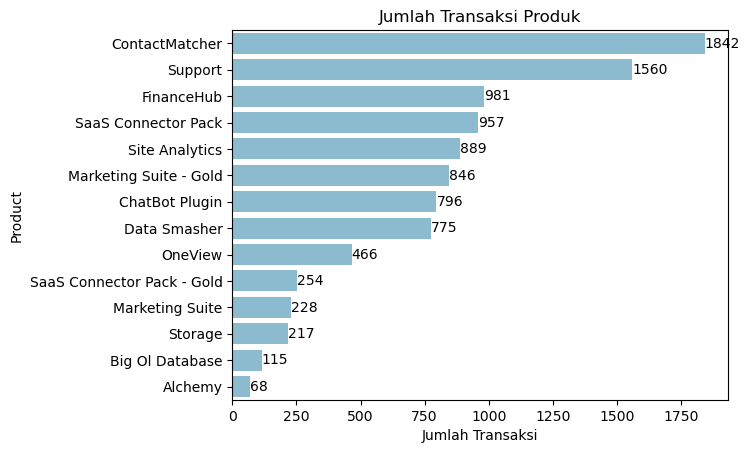

In [193]:
jumlaht_ransaksi = sns.barplot(y = jumlah_product['Product'], x = jumlah_product['Jumlah Transaksi'],color= '#81BFDA')
jumlaht_ransaksi.bar_label(jumlahtransaksi.containers[0])
plt.title('Jumlah Transaksi Produk')
plt.show()

In [132]:
# Analisis Total Penjualan Berdasrkan Produk yang Paling Sering Dibeli
produk_penjualan_profit = saas_sales.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Profit', ascending=False).reset_index()
print(produk_penjualan_profit)

                       Product        Sales      Profit
0                      Alchemy  149528.0300  55617.8249
1               Site Analytics  330007.0540  44515.7306
2                 Data Smasher  167380.3180  41936.6357
3                      Support  125152.7440  32864.4698
4                   FinanceHub  340935.4150  32136.4203
5       Marketing Suite - Gold  223843.6080  21278.8264
6                      OneView  107532.1610  18138.0054
7          SaaS Connector Pack   91705.1640  13059.1436
8               ContactMatcher  410378.2650  12496.2822
9   SaaS Connector Pack - Gold   16476.4020   6964.1767
10              ChatBot Plugin   27118.7920   6527.7870
11             Big Ol Database  189238.6310   3384.7569
12                     Storage    3024.2800    949.5182
13             Marketing Suite  114879.9963  -3472.5560


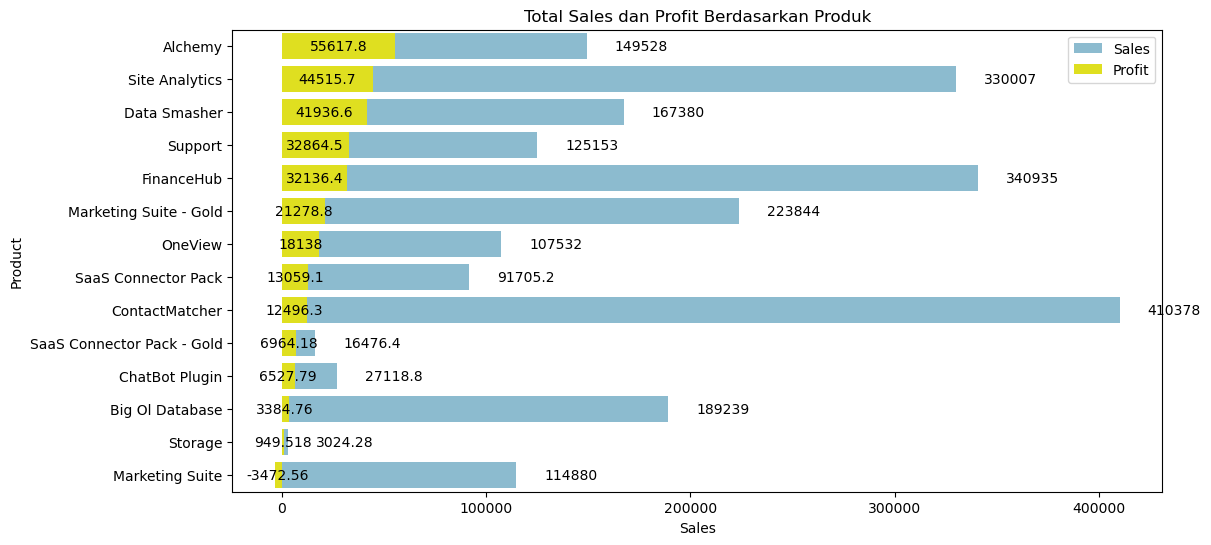

In [197]:
# Visualisasi Penjualan Berdasarkan Produk yang Paling Sering Dibeli
plt.figure(figsize=(12, 6))
sales = sns.barplot(x= 'Sales', y= 'Product', data = produk_penjualan_profit, color= '#81BFDA', label= 'Sales', dodge= False)
sales.bar_label(sales.containers[0], padding= 20)
profit = sns.barplot(x= 'Profit', y= 'Product', data = produk_penjualan_profit, color= 'Yellow', label= 'Profit', dodge= False)
profit.bar_label(profit.containers[1], label_type='center')
plt.title('Total Sales dan Profit Berdasarkan Produk')
plt.legend()
plt.show()

**Interpretasi:**

`Jumlah Transaksi Produk`
- Produk dengan Transaksi Tertinggi:

ContactMatcher (1,842 transaksi) dan Support (1,560 transaksi) adalah produk dengan jumlah transaksi tertinggi, menunjukkan popularitasnya di pasar.
- Produk dengan Transaksi Terendah:

Alchemy (68 transaksi) dan Big Ol Database (115 transaksi) mencatat transaksi terendah, menunjukkan potensi kurangnya daya tarik atau keterbatasan pasarnya.

`Total Penjualan dan Profit Berdasarkan Produk`
- Produk Terbaik:
    + Site Analytics: Produk paling sukses dengan penjualan 330,007.05 dan profit tertinggi 44,515.73.
    + Alchemy: Profit efisien sebesar 55,617.82 dari penjualan 149,528.03.

- Produk dengan Profit Positif Signifikan:
    + Data Smasher: Penjualan 176,379.31 dan profit 41,936.64, memberikan kontribusi besar.
    + FinanceHub: Penjualan 340,955.42 dengan profit stabil 32,136.42.
    + Support: Solid dengan penjualan 125,152.74 dan profit 32,864.41.

- Produk dengan Profit Rendah:
    + Big Ol Database: Penjualan tinggi 189,238.63 tetapi profit hanya 338.48, mencerminkan efisiensi rendah.
    + OneView: Penjualan 107,523.16, profit rendah 18,183.08.

- Produk Bermasalah (Profit Negatif):
    + Marketing Suite: Penjualan 114,879.99 tetapi kerugian besar -3,472.56, memerlukan evaluasi mendalam.

- Produk Potensial dengan Penjualan Rendah tetapi Profit Positif:
    + SaaS Connector Pack - Gold: Penjualan 16,476.42, profit 6,964.18.
    + ChatBot Plugin: Penjualan 27,118.79, profit 6,527.79.

- Produk dengan Penjualan dan Profit Sangat Rendah:
    + Storage: Penjualan hanya 3,024.28 dan profit 949.52, menunjukkan daya tarik pasar yang sangat rendah.


`2.Mengukur efektivitas diskon terhadap penjualan berdasarkan data seperti wilayah penjualan, segmen pelanggan, dan produk yang paling sering dibeli`

Proses ini melibatkan penentuan rentang nilai diskon, lalu setiap nilai diskon akan dimasukkan ke dalam kelompok sesuai dengan aturan rentang tersebut.
Berikut adalah rincian langkah-langkahnya:

**`Definisi Kelompok Diskon`**

Mendefinisikan kelompok diskon seperti berikut:

- Kelompok 1 (Tanpa Diskon): Diskon = 0.00
- Kelompok 2 (Diskon Rendah): 0.01 ≤ Diskon ≤ 0.20
- Kelompok 3 (Diskon Sedang): 0.21 ≤ Diskon ≤ 0.50
- Kelompok 4 (Diskon Tinggi): 0.51 ≤ Diskon ≤ 0.80

Setiap nilai diskon akan diperiksa untuk melihat ke rentang mana nilai tersebut masuk.

In [138]:
# Fungsi untuk mengelompokkan diskon
def categorize_discount(discount):
    if discount == 0.00:
        return 'Kelompok 1 (Tanpa Diskon)'
    elif 0.01 <= discount <= 0.20:
        return 'Kelompok 2 (Diskon Rendah)'
    elif 0.21 <= discount <= 0.50:
        return 'Kelompok 3 (Diskon Sedang)'
    elif 0.51 <= discount <= 0.80:
        return 'Kelompok 4 (Diskon Tinggi)'
    else:
        return 'Kelompok Lain'

# Tambahkan kolom kategori berdasarkan kolom diskon
if 'Discount' in saas_sales.columns:
    saas_sales['Discount Category'] = saas_sales['Discount'].apply(categorize_discount)
else:
    raise ValueError("Kolom 'Discount' tidak ditemukan dalam file.")

In [139]:
saas_sales.head(5)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Discount Category
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,Kelompok 1 (Tanpa Diskon)
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Kelompok 1 (Tanpa Diskon)
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,Kelompok 1 (Tanpa Diskon)
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Kelompok 3 (Diskon Sedang)
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,Kelompok 2 (Diskon Rendah)


**`Mengukur efektivitas diskon terhadap penjualan berdasarkan data wilayah penjualan`**

In [141]:
# Analisis efektivitas diskon penjualan berdasarkan Region
region_penjualan_diskon = saas_sales.groupby(['Region', 'Discount Category'])['Sales'].sum().reset_index()
print(f"Efektivitas Diskon Penjualan Berdasarkan Region\n {region_penjualan_diskon}\n")


# Analisis efektivitas diskon penjualan berdasarkan suberegion 
subregion_penjualan_diskon = saas_sales.groupby(['Subregion', 'Discount Category'])['Sales'].sum().reset_index()
print(f"Efektivitas Diskon Penjualan Berdasarkan Subregion\n {subregion_penjualan_diskon}\n")

Efektivitas Diskon Penjualan Berdasarkan Region
    Region           Discount Category        Sales
0    AMER   Kelompok 1 (Tanpa Diskon)  379887.9900
1    AMER  Kelompok 2 (Diskon Rendah)  400396.7295
2    AMER  Kelompok 3 (Diskon Sedang)   42999.0450
3    AMER  Kelompok 4 (Diskon Tinggi)   14565.8400
4     APJ   Kelompok 1 (Tanpa Diskon)  156912.5200
5     APJ  Kelompok 2 (Diskon Rendah)  124151.5360
6     APJ  Kelompok 3 (Diskon Sedang)  110791.7288
7     APJ  Kelompok 4 (Diskon Tinggi)   23608.4560
8    EMEA   Kelompok 1 (Tanpa Diskon)  551107.9600
9    EMEA  Kelompok 2 (Diskon Rendah)  321973.9750
10   EMEA  Kelompok 3 (Diskon Sedang)  144750.6380
11   EMEA  Kelompok 4 (Diskon Tinggi)   26054.4420

Efektivitas Diskon Penjualan Berdasarkan Subregion
    Subregion           Discount Category        Sales
0        ANZ   Kelompok 1 (Tanpa Diskon)    3009.5700
1        ANZ  Kelompok 2 (Diskon Rendah)   44395.9600
2        ANZ  Kelompok 3 (Diskon Sedang)   29152.8510
3        ANZ  Kelom

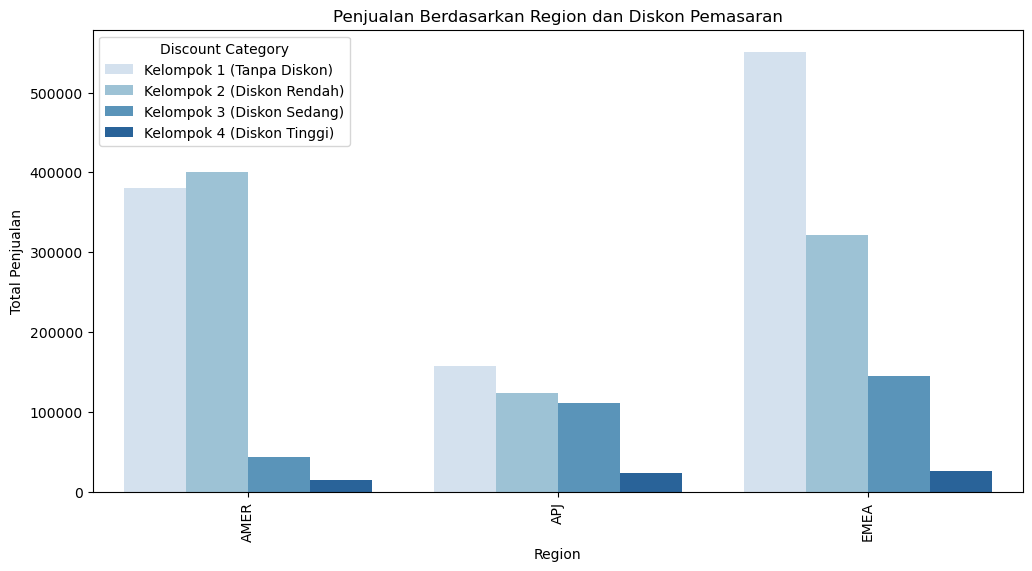

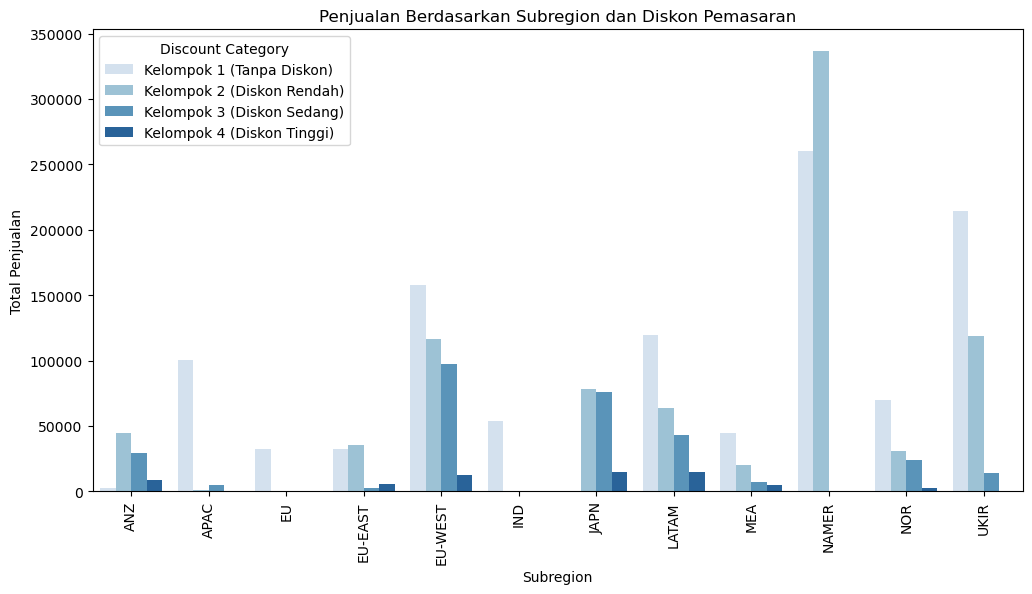

In [142]:
# Visualisasi analisis efektivitas diskon penjualan berdasarkan region 
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', hue='Discount Category', data=region_penjualan_diskon, palette='Blues')
plt.title('Penjualan Berdasarkan Region dan Diskon Pemasaran')
plt.xlabel('Region')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()


# Visualisasi analisis efektivitas diskon penjualan berdasarkan subregion 
plt.figure(figsize=(12, 6))
sns.barplot(x='Subregion', y='Sales', hue='Discount Category', data=subregion_penjualan_diskon, palette='Blues')
plt.title('Penjualan Berdasarkan Subregion dan Diskon Pemasaran')
plt.xlabel('Subregion')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()

**Interpretasi:**

`Efektivitas Diskon Berdasarkan Region`
- Wilayah AMER:
    + Diskon Rendah (Kelompok 2) adalah yang paling efektif dalam mendorong penjualan.
    + Penjualan tinggi juga ditemukan pada transaksi tanpa diskon (Kelompok 1), menunjukkan bahwa pelanggan di wilayah ini tidak terlalu sensitif terhadap diskon.
- Wilayah APJ:
    + Pelanggan di wilayah ini lebih memilih produk tanpa diskon (Kelompok 1), diikuti oleh diskon rendah (Kelompok 2).
    + Diskon sedang dan tinggi kurang efektif dibandingkan kelompok lainnya.
- Wilayah EMEA:
    + Wilayah ini memiliki kecenderungan yang mirip dengan APJ, di mana transaksi tanpa diskon (Kelompok 1) memberikan kontribusi penjualan terbesar.
    + Diskon rendah (Kelompok 2) juga efektif, tetapi diskon sedang dan tinggi kurang diminati.

`Efektivitas Diskon Berdasarkan Subregion`
- NAMER dan EU-WEST:
    + Diskon Rendah (Kelompok 2) paling efektif dalam mendorong penjualan.
    + Tanpa Diskon (Kelompok 1) tetap mendominasi, menunjukkan bahwa pelanggan di subregion ini tidak terlalu bergantung pada diskon besar untuk bertransaksi.
- APAC dan MEA:
    + Diskon tinggi (Kelompok 4) tidak efektif dalam meningkatkan penjualan.
    + Penjualan lebih cenderung terjadi pada kategori tanpa diskon atau diskon rendah.

**`Mengukur efektivitas diskon terhadap penjualan berdasarkan segmen pelanggan`**

In [146]:
# Analisis efektivitas diskon penjualan berdasarkan Segmen Pelanggan
segmen_penjualan_diskon = saas_sales.groupby(['Segment', 'Discount Category'])['Sales'].sum().reset_index()
print(f"Efektivitas Diskon Penjualan Berdasarkan Segmen Pelanggan\n {segmen_penjualan_diskon}\n")


# Analisis efektivitas diskon penjualan berdasarkan Industry Pelanggan 
industri_penjualan_diskon = saas_sales.groupby(['Industry', 'Discount Category'])['Sales'].sum().reset_index()
print(f"Efektivitas Diskon Penjualan Berdasarkan Industry Pelanggan\n {industri_penjualan_diskon}\n")

Efektivitas Diskon Penjualan Berdasarkan Segmen Pelanggan
        Segment           Discount Category        Sales
0   Enterprise   Kelompok 1 (Tanpa Diskon)  196533.6500
1   Enterprise  Kelompok 2 (Diskon Rendah)  158944.9260
2   Enterprise  Kelompok 3 (Diskon Sedang)   62481.5955
3   Enterprise  Kelompok 4 (Diskon Tinggi)   11692.9770
4          SMB   Kelompok 1 (Tanpa Diskon)  532517.1000
5          SMB  Kelompok 2 (Diskon Rendah)  439661.5500
6          SMB  Kelompok 3 (Diskon Sedang)  153179.9860
7          SMB  Kelompok 4 (Diskon Tinggi)   36042.7090
8    Strategic   Kelompok 1 (Tanpa Diskon)  358857.7200
9    Strategic  Kelompok 2 (Diskon Rendah)  247915.7645
10   Strategic  Kelompok 3 (Diskon Sedang)   82879.8303
11   Strategic  Kelompok 4 (Diskon Tinggi)   16493.0520

Efektivitas Diskon Penjualan Berdasarkan Industry Pelanggan
              Industry           Discount Category        Sales
0      Communications   Kelompok 1 (Tanpa Diskon)   60351.6500
1      Communications  Ke

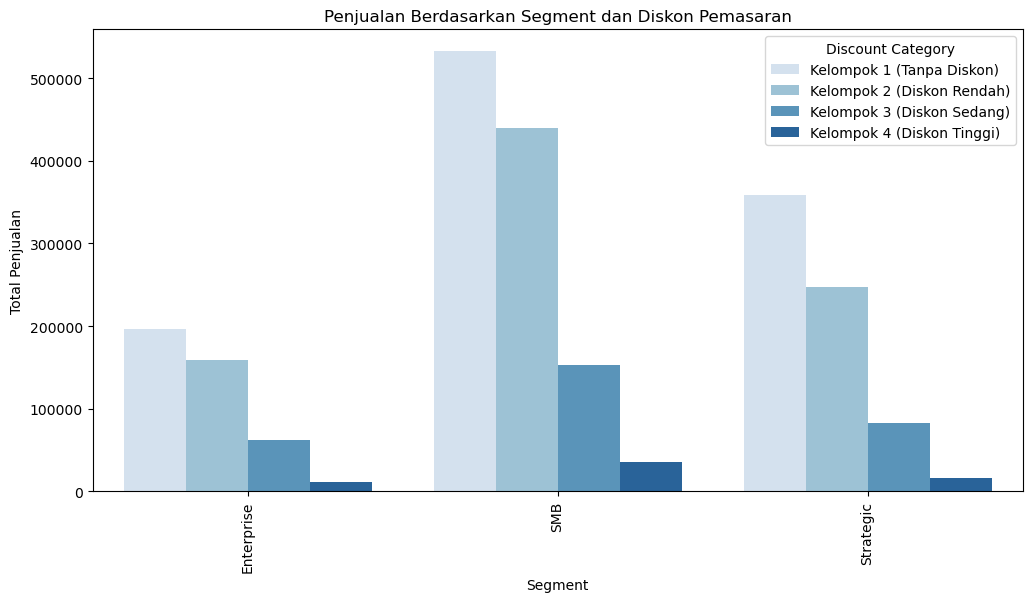

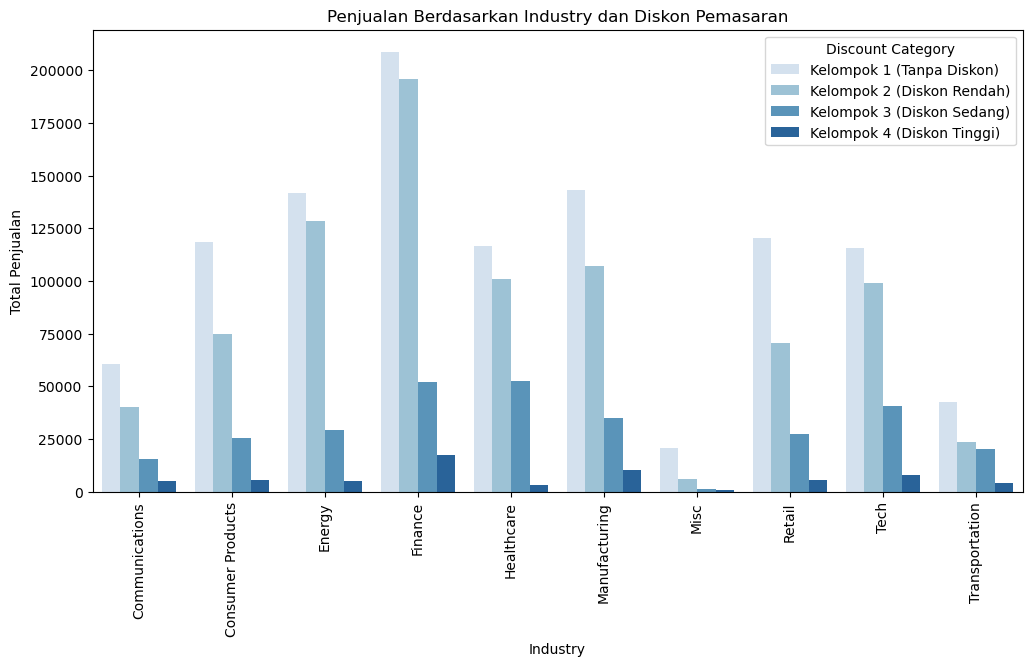

In [147]:
# Visualisasi analisis efektivitas diskon penjualan berdasarkan Segmen Pelanggan 
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Sales', hue='Discount Category', data=segmen_penjualan_diskon, palette='Blues')
plt.title('Penjualan Berdasarkan Segment dan Diskon Pemasaran')
plt.xlabel('Segment')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()


# Visualisasi analisis efektivitas diskon penjualan berdasarkan Industry Pelanggan 
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='Sales', hue='Discount Category', data=industri_penjualan_diskon, palette='Blues')
plt.title('Penjualan Berdasarkan Industry dan Diskon Pemasaran')
plt.xlabel('Industry')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()

**Interpretasi:**

`Efektivitas Diskon Berdasarkan Segmen`
- Diskon Rendah (Kelompok 2):
    + Efektif di semua segmen, terutama untuk segmen SMB dan Strategic.
    + Diskon rendah memberikan kontribusi penjualan yang konsisten di seluruh segmen pelanggan.
- Tanpa Diskon (Kelompok 1):
    + Segmen SMB dan Strategic memiliki kontribusi penjualan yang sangat besar pada kategori tanpa diskon.
    + Pelanggan Enterprise lebih cenderung bertransaksi dengan diskon dibandingkan tanpa diskon.
- Diskon Sedang (Kelompok 3):
    + Efektif di segmen Enterprise, tetapi kontribusinya lebih rendah dibandingkan diskon rendah dan tanpa diskon di segmen SMB dan Strategic.
- Diskon Tinggi (Kelompok 4):
    + Tidak efektif di semua segmen. Penjualan pada kategori ini adalah yang terendah untuk ketiga segmen.

`Efektivitas Diskon Berdasarkan Industri`
- Diskon Rendah (Kelompok 2):
    + Sangat efektif di industri Finance, Energy, dan Manufacturing.
    + Industri ini cenderung meningkatkan penjualan secara signifikan dengan diskon rendah.
- Tanpa Diskon (Kelompok 1):
    + Mendominasi di semua industri utama, terutama Finance, Manufacturing, dan Retail.
    + Menunjukkan bahwa sebagian besar pelanggan di industri ini tetap membeli meskipun tanpa diskon.
- Diskon Sedang (Kelompok 3):
    + Memberikan kontribusi moderat di industri seperti Finance, Energy, dan Manufacturing, tetapi tidak signifikan di industri lainnya.
- Diskon Tinggi (Kelompok 4):
    + Tidak efektif di semua industri. Penjualan pada kategori ini sangat kecil, bahkan di industri dengan kontribusi penjualan tinggi seperti Finance dan Manufacturing.

**`Mengukur efektivitas diskon terhadap penjualan berdasarkan produk yang paling sering dibeli`**

In [151]:
# Analisis efektivitas diskon Berdasarkan Produk yang Paling Sering Dibeli
produk_penjualan_diskon = saas_sales.groupby(['Product', 'Discount Category'])['Sales'].sum().reset_index()
print(f"Efektivitas Diskon Penjualan Berdasarkan Product\n {produk_penjualan_diskon}\n")

Efektivitas Diskon Penjualan Berdasarkan Product
                        Product           Discount Category        Sales
0                      Alchemy   Kelompok 1 (Tanpa Diskon)   76449.1800
1                      Alchemy  Kelompok 2 (Diskon Rendah)   56159.0480
2                      Alchemy  Kelompok 3 (Diskon Sedang)   16919.8020
3              Big Ol Database   Kelompok 1 (Tanpa Diskon)   71034.0000
4              Big Ol Database  Kelompok 2 (Diskon Rendah)   41365.5230
5              Big Ol Database  Kelompok 3 (Diskon Sedang)   61237.5990
6              Big Ol Database  Kelompok 4 (Diskon Tinggi)   15601.5090
7               ChatBot Plugin   Kelompok 1 (Tanpa Diskon)   18014.6400
8               ChatBot Plugin  Kelompok 2 (Diskon Rendah)    9104.1520
9               ContactMatcher   Kelompok 1 (Tanpa Diskon)  153408.2400
10              ContactMatcher  Kelompok 2 (Diskon Rendah)  130872.8720
11              ContactMatcher  Kelompok 3 (Diskon Sedang)   89956.5400
12            

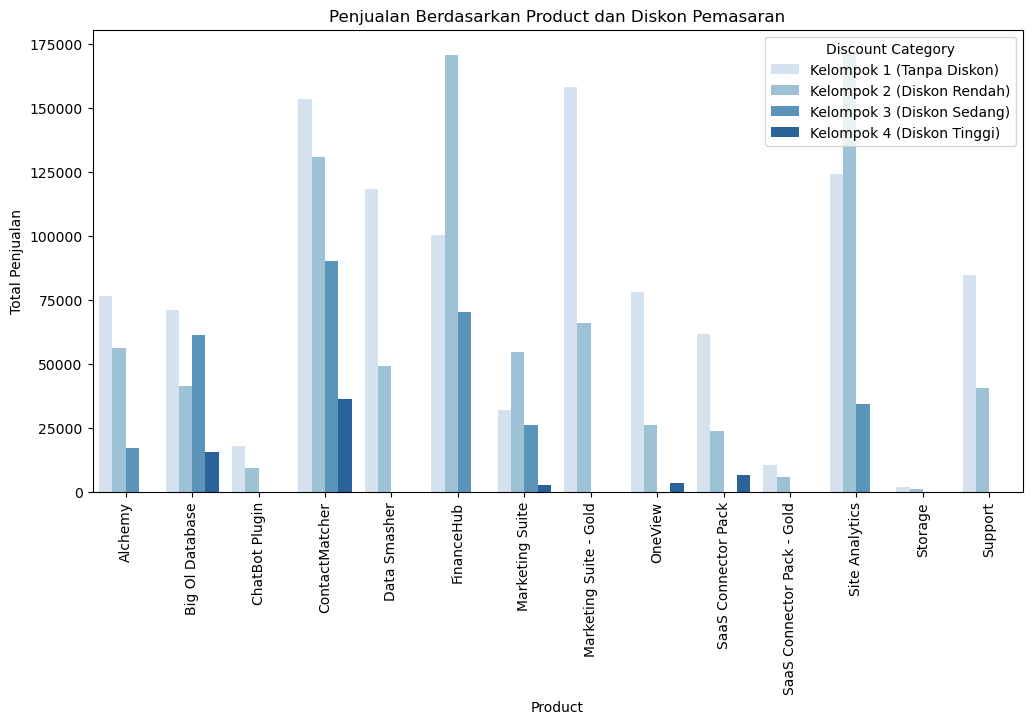

In [152]:
# Visualisasi analisis efektivitas diskon Berdasarkan Produk yang Paling Sering Dibeli
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Sales', hue='Discount Category', data=produk_penjualan_diskon, palette='Blues')
plt.title('Penjualan Berdasarkan Product dan Diskon Pemasaran')
plt.xlabel('Product')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()

### **Interpretasi:**

`Efektivitas diskon terhadap penjualan berdasarkan produk yang paling sering dibeli`

Kelompok 1 (Tanpa Diskon):
- Kategori ini memberikan kontribusi penjualan tertinggi pada sebagian besar produk, misalnya:
    + Alchemy (76,449.18)
    + ContactMatcher (153,448.24)
    + Site Analytics (123,879.71)
    + Hal ini menunjukkan bahwa pelanggan cenderung membeli produk tanpa diskon, terutama untuk produk dengan nilai tinggi seperti FinanceHub, ContactMatcher, dan Site Analytics.

Kelompok 2 (Diskon Rendah):
- Diskon rendah efektif pada beberapa produk dengan kontribusi penjualan yang signifikan, seperti:
    + FinanceHub (170,269.62)
    + ContactMatcher (130,872.87)
    + Produk seperti Marketing Suite - Gold (65,989.85) dan Big Ol Database (41,365.52) juga mendapat manfaat dari diskon rendah.

Kelompok 3 (Diskon Sedang):
- Penjualan pada diskon sedang lebih rendah dibandingkan kategori lainnya. Misalnya:
    + ContactMatcher (89,956.54)
    + Big Ol Database (31,657.59)
    + Diskon sedang tidak memberikan dampak penjualan yang signifikan pada sebagian besar produk.

Kelompok 4 (Diskon Tinggi):
- Diskon tinggi menghasilkan penjualan terendah untuk hampir semua produk, seperti:
    + ContactMatcher (36,140.61)
    + Big Ol Database (15,601.51)
    + Hal ini menunjukkan bahwa diskon tinggi kurang diminati oleh pelanggan, bahkan untuk produk dengan nilai lebih rendah.

In [155]:
# Analisis Total Penjualan Berdasrkan Produk yang Paling Sering Dibeli
diskon_penjualan_profit = saas_sales.groupby('Discount Category').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Profit', ascending=False).reset_index()
print(diskon_penjualan_profit)

            Discount Category         Sales       Profit
0   Kelompok 1 (Tanpa Diskon)  1.087908e+06  320987.6032
1  Kelompok 2 (Diskon Rendah)  8.465222e+05  100785.4745
2  Kelompok 3 (Diskon Sedang)  2.985414e+05  -58817.0047
3  Kelompok 4 (Diskon Tinggi)  6.422874e+04  -76559.0513


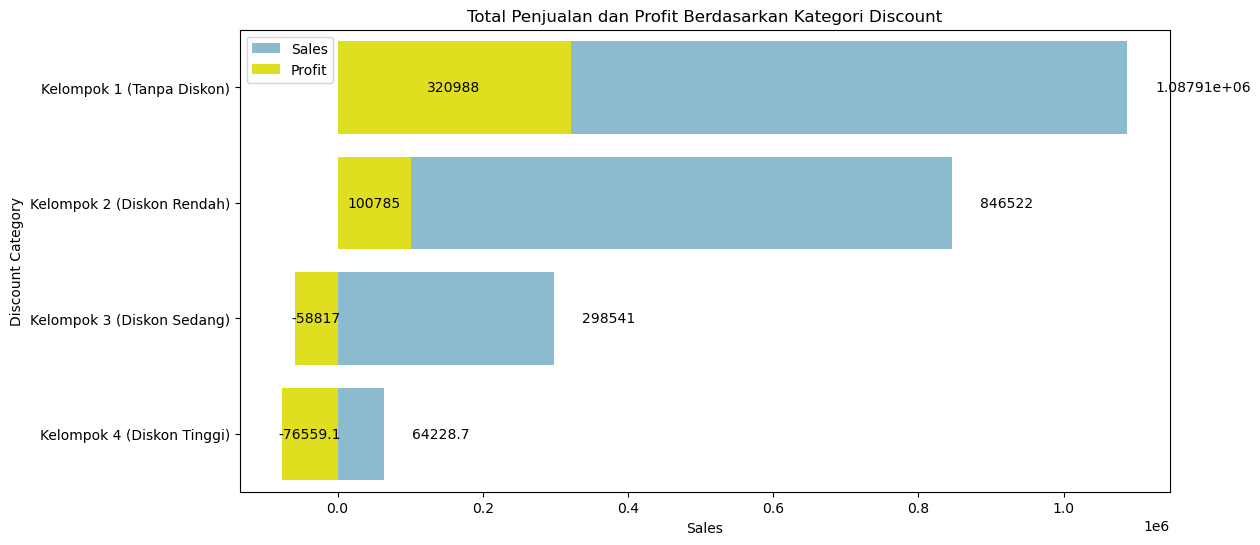

In [156]:
# Visualisasi Penjualan Berdasarkan Produk yang Paling Sering Dibeli
plt.figure(figsize=(12, 6))
sales = sns.barplot(x= 'Sales', y= 'Discount Category', data = diskon_penjualan_profit, color= '#81BFDA', label= 'Sales', dodge= False)
sales.bar_label(sales.containers[0], padding= 20)
profit = sns.barplot(x= 'Profit', y= 'Discount Category', data = diskon_penjualan_profit, color= 'Yellow', label= 'Profit', dodge= False)
profit.bar_label(profit.containers[1], label_type='center')
plt.title('Total Penjualan dan Profit Berdasarkan Kategori Discount')
plt.legend()
plt.show()

**Interpretasi:**

`Efektivitas Diskon Terhadap Penjualan dan Profit`

- Kelompok 1 (Tanpa Diskon):
Kategori ini menghasilkan penjualan dan profit tertinggi. Ini menunjukkan bahwa sebagian besar pelanggan bersedia membeli tanpa insentif diskon, terutama untuk produk bernilai tinggi atau kebutuhan mendesak. Strategi tanpa diskon bisa terus dioptimalkan untuk menjaga profitabilitas.

- Kelompok 2 (Diskon Rendah):
Diskon rendah memberikan kontribusi besar terhadap penjualan kedua tertinggi dan profit positif yang signifikan. Ini menunjukkan bahwa pelanggan merespons diskon kecil dengan tetap menjaga margin keuntungan yang sehat. Kategori ini efektif untuk menarik lebih banyak pelanggan tanpa mengorbankan profitabilitas.

- Kelompok 3 (Diskon Sedang):
Meskipun memberikan kontribusi penjualan moderat, kategori ini mencatat profit negatif. Hal ini menunjukkan bahwa diskon sedang kurang efisien karena penurunan margin yang tidak terkompensasi oleh peningkatan volume penjualan.

- Kelompok 4 (Diskon Tinggi):
Diskon tinggi menghasilkan penjualan dan profit terendah, dengan margin yang negatif. Ini menunjukkan bahwa strategi diskon tinggi tidak efektif dalam meningkatkan penjualan atau profitabilitas dan hanya cocok untuk situasi clearance atau produk dengan daya tarik rendah.

`Analisis Tren Penjualan: Mengidentifikasi tren penjualan dan profit dari waktu ke waktu` 

In [160]:
# Menambahkan kolom bulan dan tahun untuk analisis 
saas_sales['Month'] = saas_sales['Order Date'].dt.month
saas_sales['Year'] = saas_sales['Order Date'].dt.year
saas_sales.head(5)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Discount Category,Month,Year
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,Kelompok 1 (Tanpa Diskon),11,2022
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Kelompok 1 (Tanpa Diskon),11,2022
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,Kelompok 1 (Tanpa Diskon),6,2022
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Kelompok 3 (Diskon Sedang),10,2021
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,Kelompok 2 (Diskon Rendah),10,2021


    Year  Month        Sales
0   2020      1   13946.2290
1   2020      2    4810.5580
2   2020      3   55691.0090
3   2020      4   28295.3450
4   2020      5   23648.2870
5   2020      6   34595.1276
6   2020      7   33946.3930
7   2020      8   27909.4685
8   2020      9   81777.3508
9   2020     10   31453.3930
10  2020     11   78628.7167
11  2020     12   69545.6205
12  2021      1   18174.0756
13  2021      2   11951.4110
14  2021      3   38726.2520
15  2021      4   34195.2085
16  2021      5   30131.6865
17  2021      6   24797.2920
18  2021      7   28765.3250
19  2021      8   36898.3322
20  2021      9   64595.9180
21  2021     10   31404.9235
22  2021     11   75972.5635
23  2021     12   74919.5212
24  2022      1   18542.4910
25  2022      2   22867.7110
26  2022      3   51186.2170
27  2022      4   39248.5930
28  2022      5   56691.0770
29  2022      6   39430.4430
30  2022      7   38440.7550
31  2022      8   33265.5643
32  2022      9   72908.1089
33  2022     1

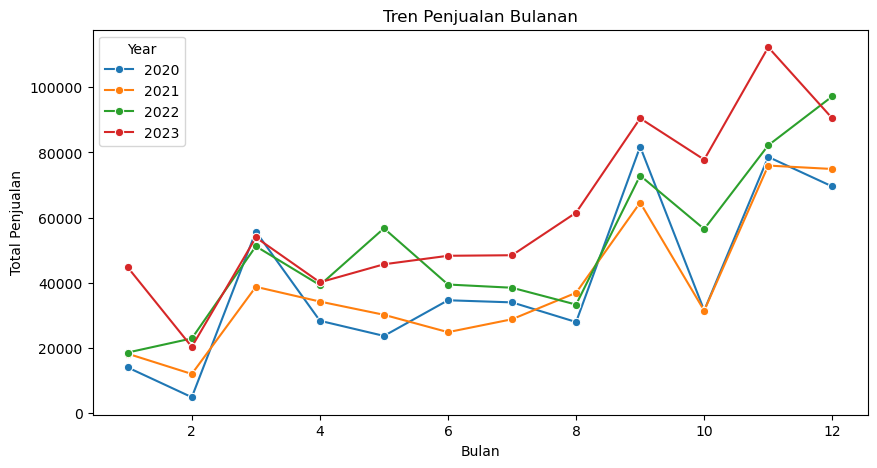

In [161]:
# Mengelompokkan data berdasarkan Tahun dan Bulan untuk tren penjualan bulanan
penjualan_bulanan = saas_sales.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
print(penjualan_bulanan)

# Visualisasi Tren Penjualan Bulanan
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Sales', hue='Year', data=penjualan_bulanan, palette='tab10', marker='o')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.show()

    Year  Month      Profit
0   2020      1   2446.7711
1   2020      2    865.7280
2   2020      3    498.7299
3   2020      4   3488.8352
4   2020      5   2738.7096
5   2020      6   4976.5244
6   2020      7   -841.4826
7   2020      8   5318.1050
8   2020      9   8328.0994
9   2020     10   3448.2573
10  2020     11   9292.1269
11  2020     12   8983.5699
12  2021      1  -3281.0070
13  2021      2   2813.8508
14  2021      3   9732.0978
15  2021      4   4187.4962
16  2021      5   4667.8690
17  2021      6   3335.5572
18  2021      7   3288.6483
19  2021      8   5355.8084
20  2021      9   8209.1627
21  2021     10   2817.3660
22  2021     11  12474.7884
23  2021     12   8016.9659
24  2022      1   2824.8233
25  2022      2   4996.2467
26  2022      3   3625.2715
27  2022      4   2957.8446
28  2022      5   8627.4764
29  2022      6   4499.5845
30  2022      7   4464.6602
31  2022      8   2328.3534
32  2022      9   9360.4910
33  2022     10  15763.3797
34  2022     11   43

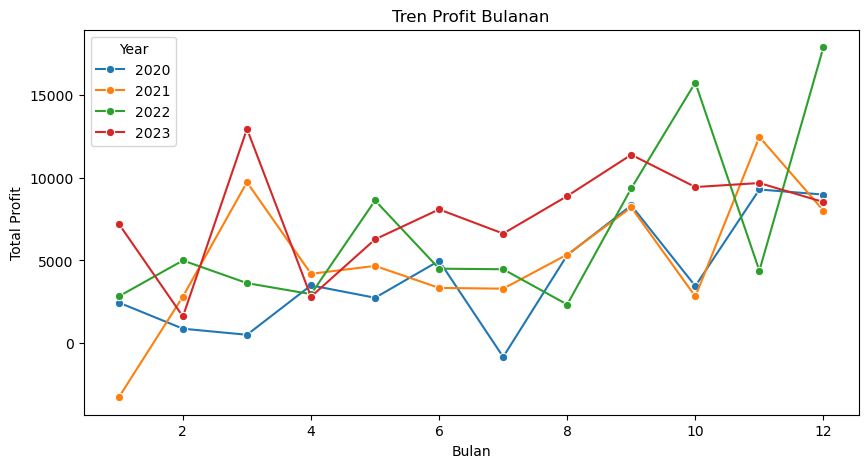

In [162]:
# Mengelompokkan Data Berdasarkan Tahun dan Bulan Untuk Tren Profit Bulanan
profit_bulanan = saas_sales.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
print(profit_bulanan)

# Visualisasi Tren Penjualan Bulanan
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Profit', hue='Year', data=profit_bulanan, palette='tab10', marker='o')
plt.title('Tren Profit Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Profit')
plt.show()

**Interpretasi:**

`Tren Penjualan Bulanan:`
- 2020: Penjualan relatif stabil namun rendah, dengan puncak terjadi pada bulan September dan penurunan di awal tahun.
- 2021: Ada sedikit peningkatan dibandingkan 2020, tetapi pola penjualan tetap serupa, dengan penurunan di awal tahun dan peningkatan signifikan pada bulan Oktober dan Desember.
- 2022: Penjualan meningkat lebih konsisten sepanjang tahun dibanding tahun sebelumnya, dengan puncak pada bulan Oktober dan Desember, menunjukkan efektivitas strategi di kuartal akhir.
- 2023: Penjualan mencapai titik tertinggi, terutama pada kuartal keempat, dengan lonjakan signifikan di bulan November dan puncak pada Desember, mencerminkan pertumbuhan yang luar biasa dibanding tahun sebelumnya.


`Tren Profit Bulanan:`
- 2020: Profit sangat fluktuatif, dengan beberapa bulan mengalami kerugian (Juli). Puncak profit terjadi pada Juni, namun secara keseluruhanprofit di tahun 2020 tidak mengalami perubahan yang terlalu besar (fluktuasi kecil) pada sebagian besar bulan.
- 2021: Profit meningkat lebih stabil dibandingkan 2020, meskipun masih mengalai kerugian di awal tahun (Januari). Puncak terjadi pada November, menandakan keberhasilan strategi di akhir tahun.
- 2022: Profit lebih konsisten sepanjang tahun, dengan peningkatan signifikan pada Oktober dan Desember. Tahun ini menunjukkan stabilitas yang lebih baik dibandingkan dua tahun sebelumnya.
- 2023: Profit mencapai level tertinggi, dengan peningkatan tajam di kuartal ketiga dan puncak pada Oktober. Tahun ini menandakan pertumbuhan profit yang luar biasa dibandingkan tahun-tahun sebelumnya.

# KESIMPULAN DAN REKOMENDASI

# A. Kesimpulan

`1. Total penjualan dan total keuntungan berdasarkan analisis kontribusi produk, negara, segmen pelanggan, dan industri`
- Negara seperti Amerika Serikat, Inggris, dan Kanada menunjukkan performa penjualan dan profit yang signifikan.
- Negara seperti Australia, Prancis, Jepang, dan Meksiko mencatat penjualan yang tinggi, tetapi sebagian besar produk memiliki margin keuntungan yang rendah atau negatif.
- Segmen pelanggan SMB memiliki total penjualan tertinggi, diikuti oleh Strategic dan Enterprise.
- Industri Finance memimpin dengan total penjualan tertinggi, diikuti oleh Energy yang menempati posisi kedua dengan kontribusi signifikan. Manufacturing berada di peringkat ketiga, melengkapi tiga besar industri dengan kontribusi penjualan terbesar.
- Site Analytics, FinanceHub, dan Data Smasher adalah produk unggulan dengan penjualan dan profit yang sangat baik, perlu diprioritaskan dalam strategi pemasaran. Alchemy memiliki profit tertinggi dibandingkan penjualan, menunjukkan peluang untuk pengembangan lebih lanjut.

`2. Mengukur efektivitas diskon terhadap penjualan berdasarkan data seperti region dan subregion, segmen pelanggan, dan produk yang paling sering dibeli`
- Pelanggan di AMER, APJ, dan EMEA lebih termotivasi oleh nilai produk dibandingkan diskon besar, dengan penjualan terbaik pada transaksi tanpa diskon (Kelompok 1) dan diskon rendah (Kelompok 2). Diskon sedang hingga tinggi kurang efektif di hampir semua wilayah, terutama di APJ, EMEA, APAC, dan MEA. Subregion NAMER dan EU-WEST mendukung tren ini, dengan transaksi tanpa diskon tetap dominan.
- Diskon rendah (Kelompok 2) efektif di semua segmen, terutama SMB dan Strategic, serta di industri Finance, Energy, dan Manufacturing. Transaksi tanpa diskon (Kelompok 1) mendominasi sebagian besar segmen dan industri, kecuali Enterprise yang lebih sensitif terhadap diskon. Diskon sedang (Kelompok 3) memiliki kontribusi terbatas, sementara diskon tinggi (Kelompok 4) tidak efektif di semua segmen dan industri.
- Tanpa Diskon (Kelompok 1) mendominasi penjualan, terutama untuk produk bernilai tinggi seperti FinanceHub dan ContactMatcher, menunjukkan pelanggan lebih menghargai nilai produk. Diskon Rendah (Kelompok 2) efektif meningkatkan penjualan tanpa mengorbankan margin, sementara Diskon Sedang (Kelompok 3) dan Diskon Tinggi (Kelompok 4) kurang efektif, dengan kontribusi penjualan terendah pada sebagian besar produk.
- Kelompok 1 (Tanpa Diskon) mencatat penjualan dan profit tertinggi, menunjukkan pelanggan bersedia membeli tanpa diskon. Kelompok 2 (Diskon Rendah) efektif dalam meningkatkan penjualan dengan profit yang tetap positif. Sebaliknya, Kelompok 3 (Diskon Sedang) dan Kelompok 4 (Diskon Tinggi) mencatat profit negatif, dengan penjualan rendah pada diskon tinggi, menunjukkan strategi ini kurang efisien dan hanya cocok untuk kasus khusus.

`3.Analisis Tren Penjualan: Mengidentifikasi tren penjualan dan profit dari waktu ke waktu`
- **Penjualan Bulanan:**
Penjualan menunjukkan tren peningkatan dari tahun ke tahun. Pada 2020, penjualan relatif stabil tetapi rendah, sementara pada 2021 terjadi sedikit peningkatan dengan puncak di akhir tahun. Tahun 2022 mencatat pertumbuhan yang lebih konsisten, terutama pada kuartal akhir, dan 2023 mencapai penjualan tertinggi, dengan puncak pada Desember, mencerminkan efektivitas strategi kuartal keempat.

- **Profit Bulanan:**
Profit juga menunjukkan peningkatan dari tahun ke tahun. Pada 2020, profit fluktuatif dan cenderung rendah, sementara 2021 mulai menunjukkan stabilitas meskipun ada kerugian di awal tahun. Tahun 2022 lebih konsisten, dengan peningkatan signifikan di akhir tahun. Pada 2023, profit mencapai level tertinggi, terutama pada kuartal ketiga dan keempat, menandakan pertumbuhan luar biasa dibanding tahun-tahun sebelumnya.



# B. Rekomendasi

`1. Total penjualan dan total keuntungan berdasarkan analisis kontribusi produk, negara, segmen pelanggan, dan industri`
- Negara dengan Penjualan dan Profit Tinggi

    + **Amerika Serikat:** Tingkatkan pemasaran untuk **ContactMatcher** dan **Site Analytics**, serta optimalkan margin keuntungan **Big Ol Database** melalui efisiensi operasional.
    + **Inggris:** Perkuat posisi **FinanceHub** dan **Site Analytics** dengan pengembangan fitur baru, serta revisi harga untuk **Support** dan **OneView** agar lebih menguntungkan.
    + **Kanada:** Maksimalkan promosi **ContactMatcher** dan tingkatkan penjualan **Site Analytics** serta **Alchemy** dengan pelatihan tambahan untuk tim penjualan.

- Negara dengan Penjualan Tinggi tetapi Profit Negatif
    + **Australia:** Perbaiki margin **FinanceHub** dan **ContactMatcher** melalui efisiensi biaya atau penyesuaian harga. Tingkatkan promosi untuk **Alchemy** dan **Data Smasher** yang memiliki margin tinggi meskipun penjualan rendah.
    + **Prancis:** Revisi harga untuk **Site Analytics** dan **ContactMatcher**. Fokuskan promosi pada **Alchemy**, **SaaS Connector Pack**, dan **Data Smasher**. Optimalkan biaya operasional **FinanceHub**
    + **Jepang:** Dorong penjualan **Site Analytics**. Promosikan **Support** dan **Data Smasher** lebih agresif. Perbaiki strategi untuk **ContactMatcher**, **FinanceHub**, dan **Big Ol Databas**
   + 
**Meksiko:** Tinjau harga dan biaya operasional untuk **Site Analytics**, **ContactMatcher**, dan **Big Ol Database**. Tingkatkan promosi untuk **SaaS Connector Pack - Gold**, **ChatBot Plugin**, **Alchemy**, dan **Support**.
- Analisis Total Penjualan dan Profit Produk Berdasarkan Segmen
    + **Enterprise:** Perkuat promosi dan kembangkan fitur tambahan untuk **ContactMatcher** dan **Site Analytics**. Tinjau ulang **Marketing Suite** untuk perbaikan produk, penyesuaian harga, atau potensi penghentian penawaran.
    + **SMB:** Maksimalkan pemasaran tersegmentasi untuk **ContactMatcher**, **Site Analytics**, dan **FinanceHub**. Evaluasi **Marketing Suite** untuk mengurangi kerugian dengan menyesuaikan harga atau meningkatkan efisiensi operasiona
    + **Strategic:** Tingkatkan promosi dan dukungan untuk **Site Analytics**. Tinjau ulang strategi harga dan biaya operasional untuk **Marketing Suite** dan produk bermasalah lainnya guna meningkatkan profitabilitas

- Analisis Total Penjualan dan Profit Produk Berdasarkan Industry Teratas
  + **Finance:** Fokus pada **Site Analytics**, **FinanceHub**, dan **ContactMatcher** dengan memperkuat pemasaran dan meningkatkan fitur produk. Optimalkan efisiensi operasional untuk **Big Ol Database** dan **Marketing Suite** agar mengurangi kerugia
  + **Energy:** Maksimalkan **Site Analytics**, **ContactMatcher**, dan **Data Smasher** melalui promosi yang relevan untuk kebutuhan industri energi. Revisi strategi **Marketing Suite** untuk meningkatkan profit.
  +  **Manufacturing:** Dorong penjualan **ContactMatcher**, **Site Analytics**, dan **FinanceHub** dengan solusi spesifik industri. Perbaiki kinerja **Marketing Suite** dan **SaaS Connector Pack** melalui evaluasi harga dan efisiensi operasioefisien.
- Total Penjualan dan Profit Berdasarkan Produk
    + Produk unggulan seperti **ContactMatcher**, **Support**, dan **Site Analytics** harus diprioritaskan untuk mempertahankan dominasi pasar.
    + Produk potensial seperti **Alchemy** dan **SaaS Connector Pack** dapat ditingkatkan melalui strategi bundling.
    + Produk bermasalah seperti **Marketing Suite** memerlukan perbaikan fitur dan rebranding untuk menghindari kerugian lebih lanjut.
    + Produk minim profit seperti **Storage** harus direvitalisasi atau dihentikan berdasarkan performa setelah upaya optimalisasi.

`2. Mengukur efektivitas diskon terhadap penjualan berdasarkan data seperti region dan subregion, segmen pelanggan, dan produk yang paling sering dibeli`

- Berdasarkan Region
    + AMER: **Diskon rendah (Kelompok 2)** dan **tanpa diskon (Kelompok 1)** efektif.
    + Strategi: Gunakan bundling tanpa diskon dan diskon kecil untuk stok kurang diminati.
    + APJ: **Tanpa diskon (Kelompok 1)** paling efektif, diikuti **diskon rendah (Kelompok 2)**.
    + Strategi: Fokus pada branding produk tanpa potongan harga dan gunakan diskon rendah untuk produk baru.
    + EMEA: Tanpa diskon dan diskon rendah dominan.
    + Strategi: Tawarkan produk premium tanpa diskon, gunakan diskon rendah untuk membersihkan stok lama.

- Berdasarkan Subregion
    + NAMER & EU-WEST: **diskon rendah** dan **tanpa diskon** paling efektif.
    + Strategi: Terapkan program loyalitas tanpa diskon dan diskon musiman untuk momen khusus.
    + APAC & MEA: **Tanpa diskon** dan **diskon rendah** lebih diminati, **diskon tinggi** tidak efektif.
    + Strategi: Tingkatkan nilai produk tanpa diskon dan gunakan diskon rendah untuk mendorong penjualan produk kurang populer.
 
- Berdasarkan Segmen

**Diskon rendah (Kelompok 2)** efektif di semua segmen, terutama SMB dan Strategic, sehingga fokus pada diskon rendah dapat menjaga konsistensi penjualan. **Tanpa diskon (Kelompok 1)** dominan di segmen SMB dan Strategic, namun kurang efektif untuk Enterprise; karena itu, promosi produk premium tanpa diskon cocok untuk SMB dan Strategic, sementara program loyalitas dapat diterapkan untuk Enterprise. **Diskon sedang (Kelompok 3)** lebih efektif di segmen Enterprise, terutama untuk produk premium, sedangkan **diskon tinggi (Kelompok 4)** terbukti tidak efektif di semua segmen dan sebaiknya dihindari.

- Berdasarkan Industri

**Diskon rendah (Kelompok 2)** sangat efektif di industri Finance, Energy, dan Manufacturing, sehingga dapat digunakan untuk produk utama serta promosi musiman. **Tanpa diskon (Kelompok 1)** mendominasi di Finance, Manufacturing, dan Retail, sehingga promosi produk premium tanpa potongan harga harus menjadi prioritas di industri ini. **Diskon sedang (Kelompok 3)** memiliki kontribusi moderat di Finance, Energy, dan Manufacturing, sehingga sebaiknya dibatasi untuk peluncuran produk baru. **Diskon tinggi (Kelompok 4)** tidak efektif di semua industri, sehingga harus dihindari dengan fokus pada promosi berbasis nilai produk.

- Berdasarkan Produk

    + Prioritaskan **tanpa diskon (Kelompok 1)** untuk produk bernilai tinggi seperti FinanceHub, ContactMatcher, dan Site Analytics melalui promosi berbasis nilai.
    + Gunakan **diskon rendah (Kelompok 2)** untuk produk dengan daya tarik sedang atau stok lama, seperti Marketing Suite - Gold dan Big Ol Database.
    + Batasi **diskon sedang (Kelompok 3)** hanya untuk kampanye tertentu.
    + Hindari **diskon tinggi (Kelompok 4)** karena tidak efektif untuk hampir semua produk, dan fokuskan pada strategi yang menjaga margin keuntungan.

- Diskon Terhadap Penjualan dan Profit
  

    + Fokus pada **Tanpa Diskon (Kelompok 1)**: Pertahankan strategi tanpa diskon untuk produk bernilai tinggi atau kebutuhan mendesak, karena memberikan kontribusi penjualan dan profit tertinggi.
    + Optimakan **Diskon Rendah (Kelompok 2)**: Gunakan diskon rendah untuk menarik pelanggan baru tanpa mengorbankan margin keuntungan, terutama pada produk dengan persaingan tinggi.
    + Minimalkan **Diskon Sedang (Kelompok 3)**: Hindari penggunaan diskon sedang, kecuali untuk segmen atau produk tertentu yang membutuhkan dorongan volume penjualan, karena cenderung merugikan profit.
    + Batasi **Diskon Tinggi (Kelompok 4)**: Gunakan diskon tinggi hanya untuk clearance stok atau produk dengan daya tarik rendah, karena kurang efektif dalam meningkatkan profitabilitasn.

`3.Analisis Tren Penjualan: Mengidentifikasi tren penjualan dan profit dari waktu ke waktu`

Puncak penjualan dan profit yang konsisten di kuartal keempat (Oktober-Desember) mengindikasikan perlunya fokus pada promosi, stok, dan logistik selama periode tersebut. Penurunan di awal tahun menunjukkan peluang untuk kampanye khusus seperti diskon awal tahun atau peluncuran produk baru guna menjaga momentum. Data historis juga membantu mengoptimalkan alokasi sumber daya, menciptakan stabilitas profit sepanjang tahun, dan mendukung proyeksi jangka panjang untuk strategi investasi dan pemasaran yang lebih efektif. Dengan analisis ini, bisnis dapat secara proaktif memanfaatkan peluang dan mengatasi tantangan yang berulang.


In [201]:
# Export to CSV
saas_sales.to_csv("AWS_SaaS_sales_cleaned.csv", index=False)